<a href="https://colab.research.google.com/github/Rafagars/Proyecto-1-Series-de-Tiempo-CO6344/blob/main/Proyecto_1_Serie_de_Tiempos_CO6344.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo SARIMA
Los datos contienen la producción de petróleo crudo mensual del estado de Texas desde Enero de 1981 hasta Julio de 2025.
Eventos externos que pueden haber afectado el modelo asociado a la producción:
* Boom del fracking a partir de 2012
* Pandemia 2020

Usando Rstudio:
* Para deducir el modelo tome los datos desde Enero de 2020 hasta Diciembre de 2024. Para medir el desempeño del modelo tome los datos desde Enero de 2025 hasta Julio 2025.
* Grafique los datos suministrados en formato de Series de Tiempo.
* Lleve a cabo un estudio completo de las series, aplicando logaritmo y/o diferenciación, de ser necesario, para transformar la serie en una estacionaria en media y varianza y sin estacionalidad.
* Proponga al menos dos modelos SARIMA para la serie y lleve a cabo una predicción desde Enero de 2020 hasta Diciembre de 2025.
* Estudie los errores de predicción usando los datos pertinentes y calcule las medida de desempeño para estas. Obtenga el mejor modelo basado en este criterio. Indique si este modelo es aconsejable para predecir la producción petrolera de Texas

In [2]:
#Instalamos las librerias que vamos a necesitar
install.packages("tidyverse")
install.packages("lubridate")
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [3]:
#Cargamos las librerias
library(tidyverse)
library(lubridate)
library(ggplot2)
library(dplyr)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [4]:
url <- "https://raw.githubusercontent.com/Rafagars/Proyecto-1-Series-de-Tiempo-CO6344/refs/heads/main/data/Texas_Field_Production_of_Crude_Oil.csv"
datos <- read.csv(url, skip = 4, header = TRUE)


In [5]:
head(datos)

,Month,Texas.Field.Production.of.Crude.Oil.Thousand.Barrels
,<chr>,<int>
1,Jul 2025,179852
2,Jun 2025,171439
3,May 2025,177037
4,Apr 2025,172512
5,Mar 2025,175557
6,Feb 2025,158613


In [6]:
tail(datos)

,Month,Texas.Field.Production.of.Crude.Oil.Thousand.Barrels
,<chr>,<int>
530,Jun 1981,77030
531,May 1981,79890
532,Apr 1981,77344
533,Mar 1981,80734
534,Feb 1981,72591
535,Jan 1981,80609


In [7]:
oil_ts = ts(datos$Texas.Field.Production.of.Crude.Oil.Thousand.Barrels, frequency = 12, start = c(1981, 1))
oil_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1981,179852,171439,177037,172512,175557,158613,172963,176226,173040,180795,173951,179942
1982,176692,172686,176313,169100,173059,160200,165130,173053,169160,172219,165726,171843
1983,171248,163086,169308,162895,169544,148642,165164,161760,159680,164631,158499,160789
1984,158400,152056,156206,152846,156751,137358,151601,156283,150673,154863,149647,151685
1985,149833,143362,148554,143855,148371,105550,143793,143673,139754,143912,139062,144841
1986,146314,137976,131027,153735,169021,156784,169076,168832,161984,165423,157510,160342
1987,158517,151394,155166,149175,150945,136620,149084,150841,144437,145587,140264,141952
1988,136928,131192,131421,126892,129755,112679,120774,122008,116714,116642,106522,104372
1989,107466,103229,105664,99874,102960,92703,99154,98263,95149,98075,93865,97485
1990,97538,94397,98289,96811,101182,95901,103746,102993,101675,105194,102304,105674


In [8]:
options(repr.plot.width = 14, repr.plot.height = 10) # Sets width to 14 inches, height to 10 inches

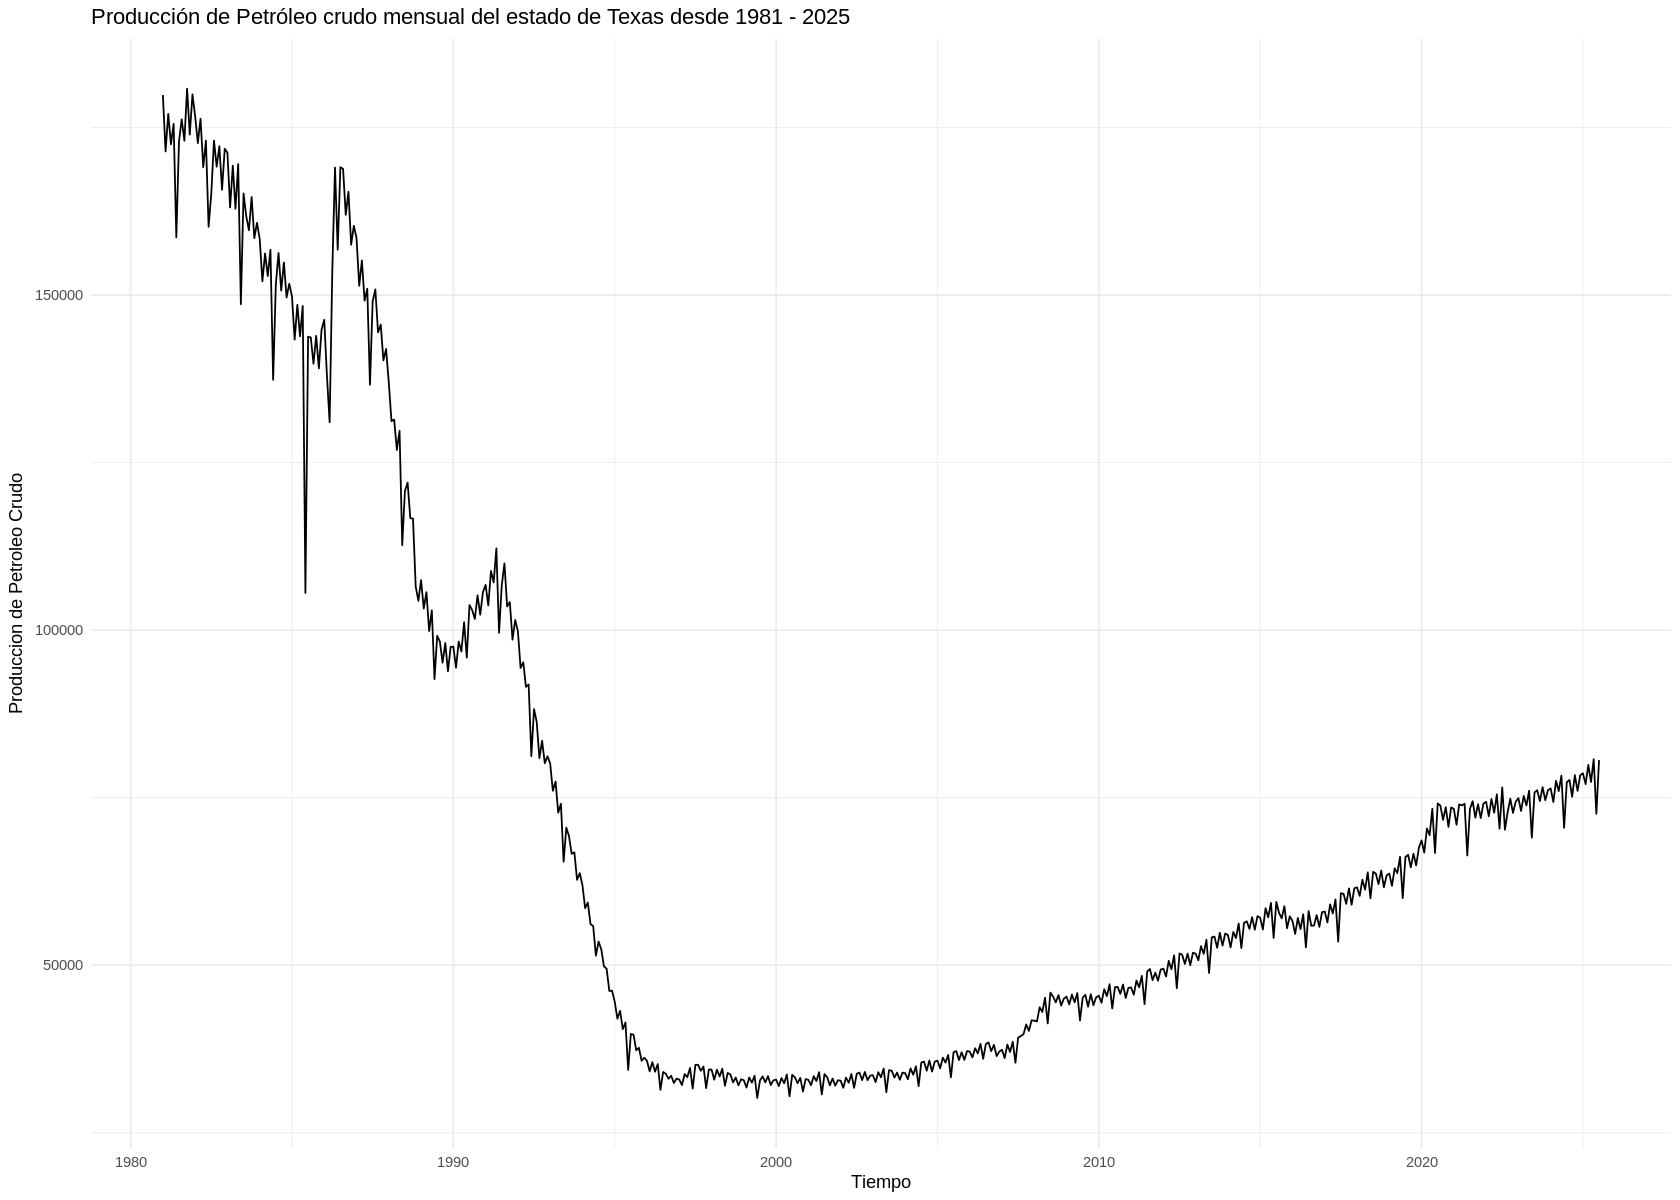

In [9]:
# Plot the 'ts' object using autoplot()
autoplot(oil_ts) +
  labs(title = "Producción de Petróleo crudo mensual del estado de Texas desde 1981 - 2025",
       x = "Tiempo",
       y = "Produccion de Petroleo Crudo") +
  theme_minimal()

In [10]:
oil_ts2 = window(oil_ts, start = 2020, end = c(2024, 12))
oil_ts2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,68621,66802,70407,69397,73344,66752,74135,73822,71690,73585,70643,73533
2021,73337,70958,74004,73839,74105,66371,73331,74466,72024,74016,71958,74123
2022,74382,72228,74806,72756,75510,70374,76531,70211,72827,74850,72726,74393
2023,74932,73020,75263,73833,76046,69034,75776,76102,74496,76561,74624,76110
2024,76378,74349,77507,75983,78298,70503,77306,77640,75135,78364,76017,78356


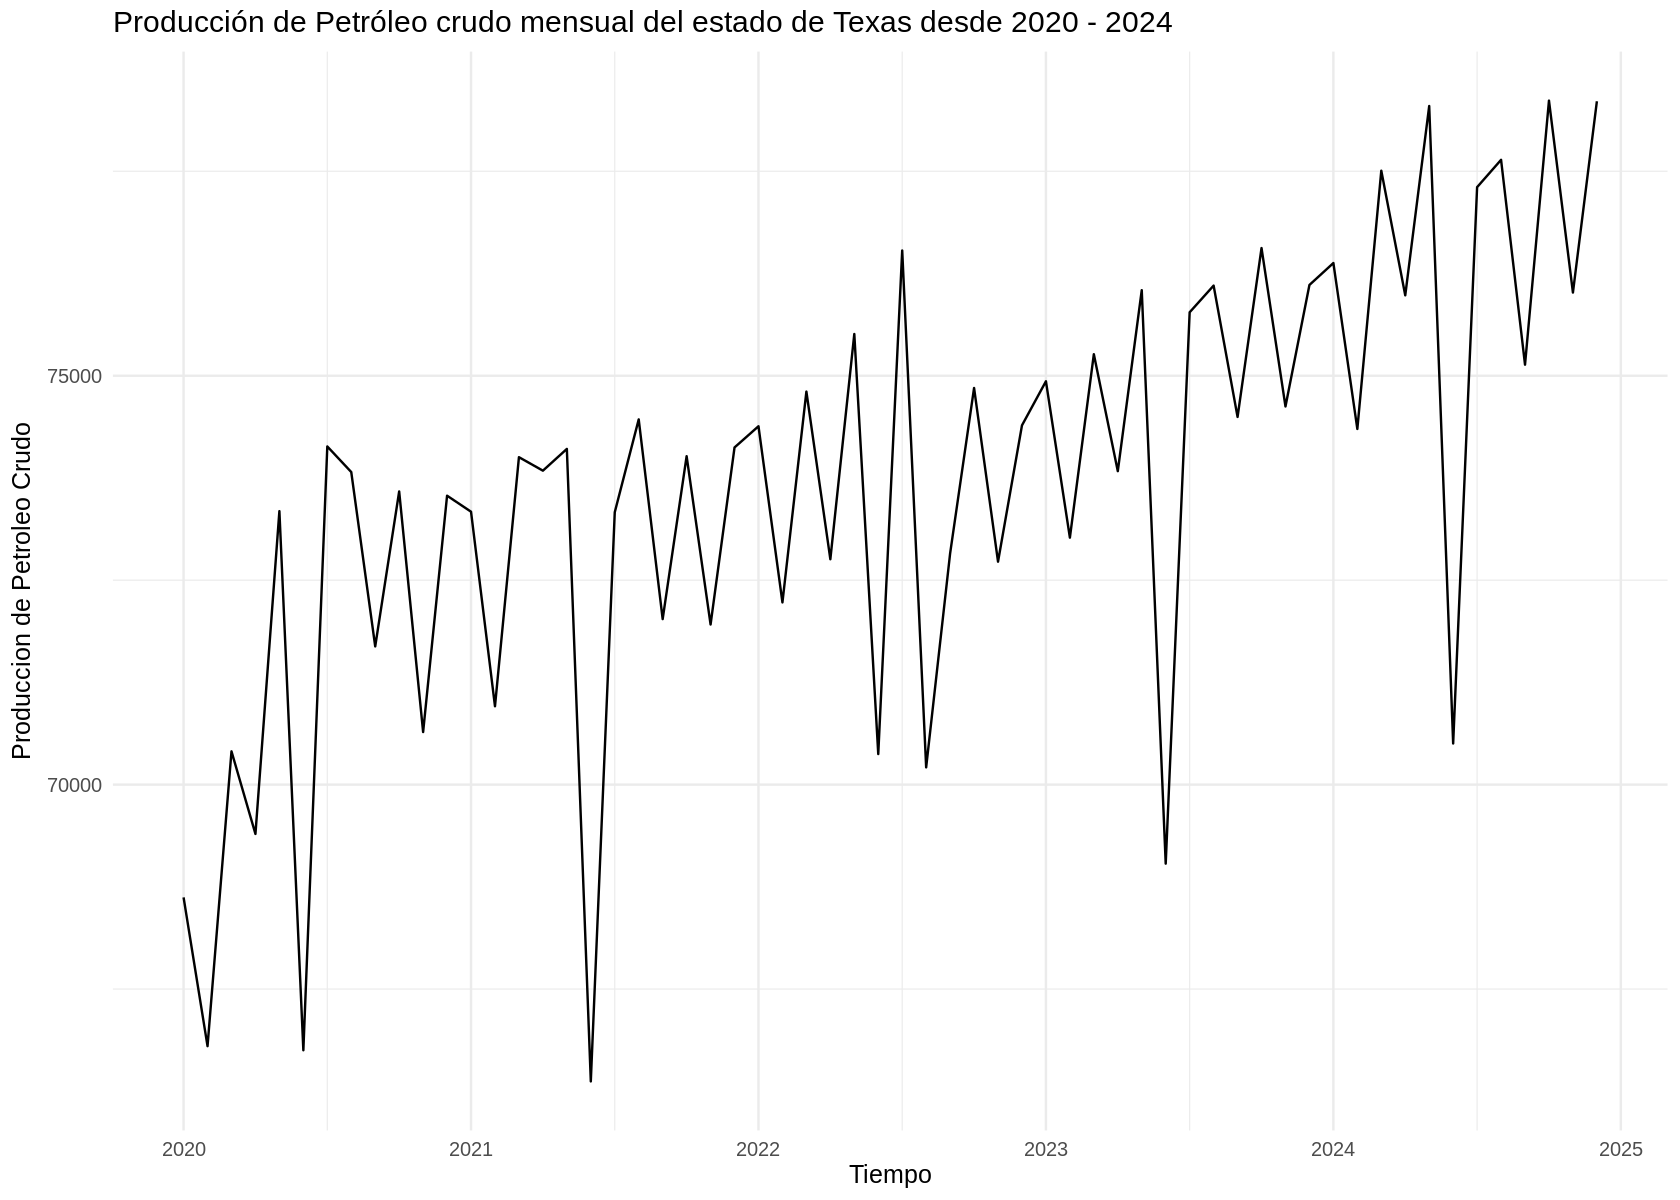

In [11]:
autoplot(oil_ts2) +
  ggtitle("Producción de Petróleo crudo mensual del estado de Texas desde 2020 - 2024") +
  xlab("Tiempo") +
  ylab("Produccion de Petroleo Crudo") +
  theme_minimal(base_size = 15)

### Chequearemos primero si la serie es estacionaria.

In [12]:
install.packages("tseries")
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
#Realizamos la prueba Dickey-Fuller Aumentada
adf.test(oil_ts2)

Warning message in adf.test(oil_ts2):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  oil_ts2
Dickey-Fuller = -4.6128, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


El hecho de que nos de un valor negativo junto con un p-valor pequeño nos esta indicando de que la la serie es estacionaria bajo la prueba Dickey-Fuller

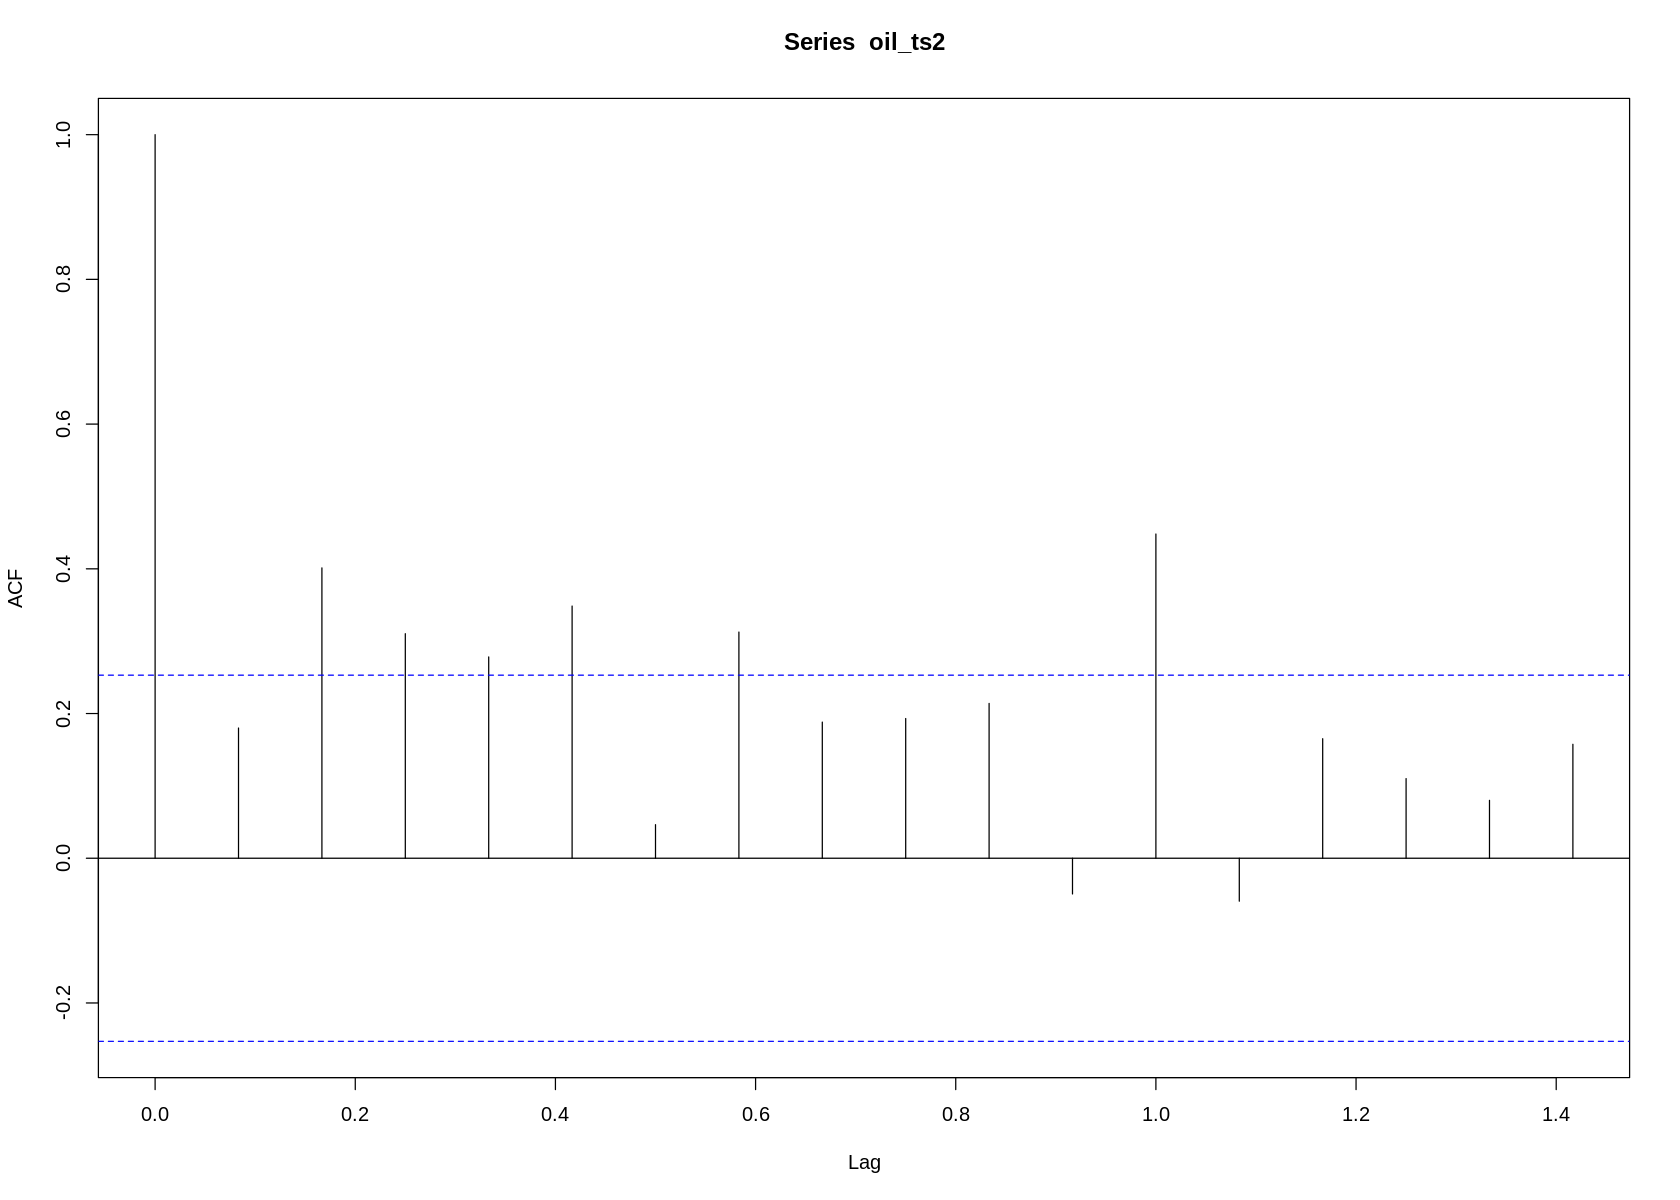

In [14]:
acf(oil_ts2)

Podemos apreciar cierto decaimiento aunque sea lento y erratico por lo que parece ser un modelo ARMA,sin diferenciacion dado que la serie es estacionaria. Pero ese pico que aparece para el retardo 12 podria indicar cierta estacionalidad

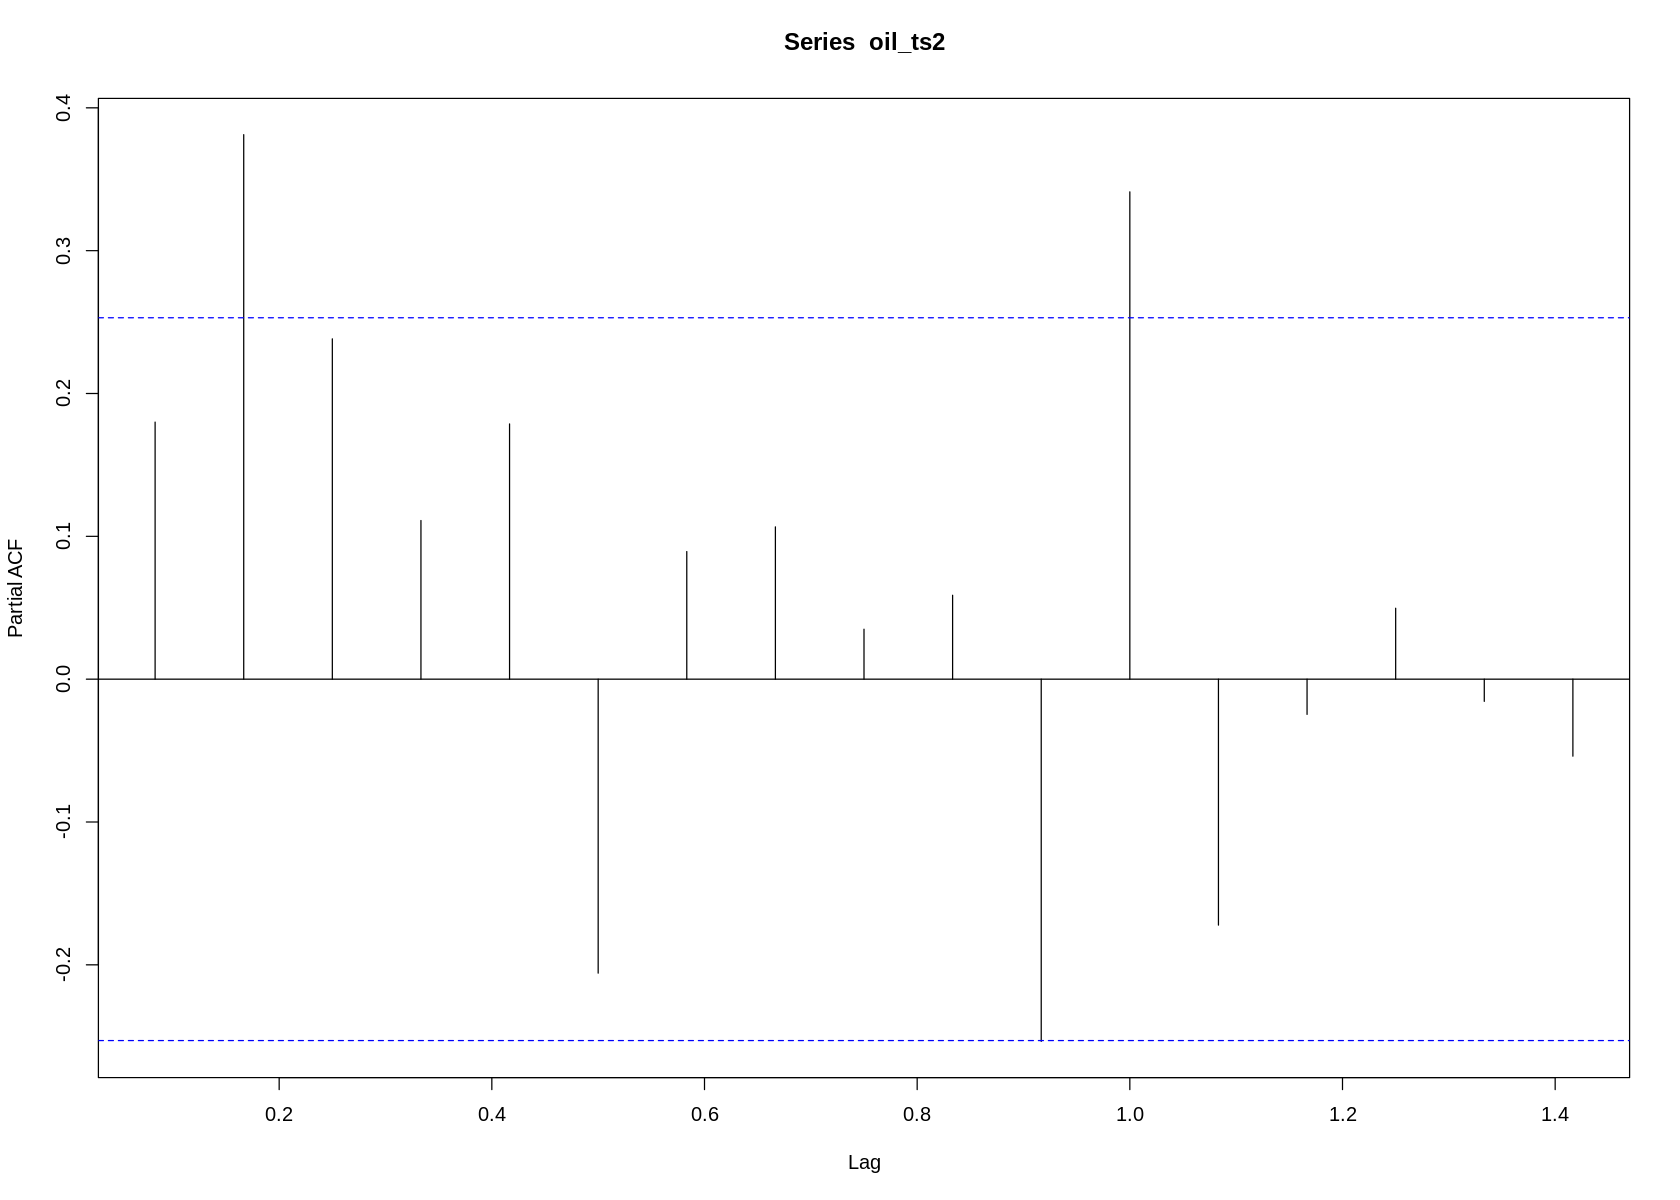

In [15]:
pacf(oil_ts2)

El decaimiento erratico en esta grafica junta con la del ACF nos parece indicar un modelo ARMA, nos queda indentificar bien el orden. Ademas como se menciono con el ACF, los picos que aparecen alrededor del retardo 11 y 12 parecieran indicar una estacionalidad.

 Por lo que realizaremos una diferenciacion estacional para eliminar esa componente

In [16]:
#Hacemos una diferenciacion estacional para eliminar ese posible componente estacional que parece estar molestando
oil_diff = diff(oil_ts2, lag = 12)

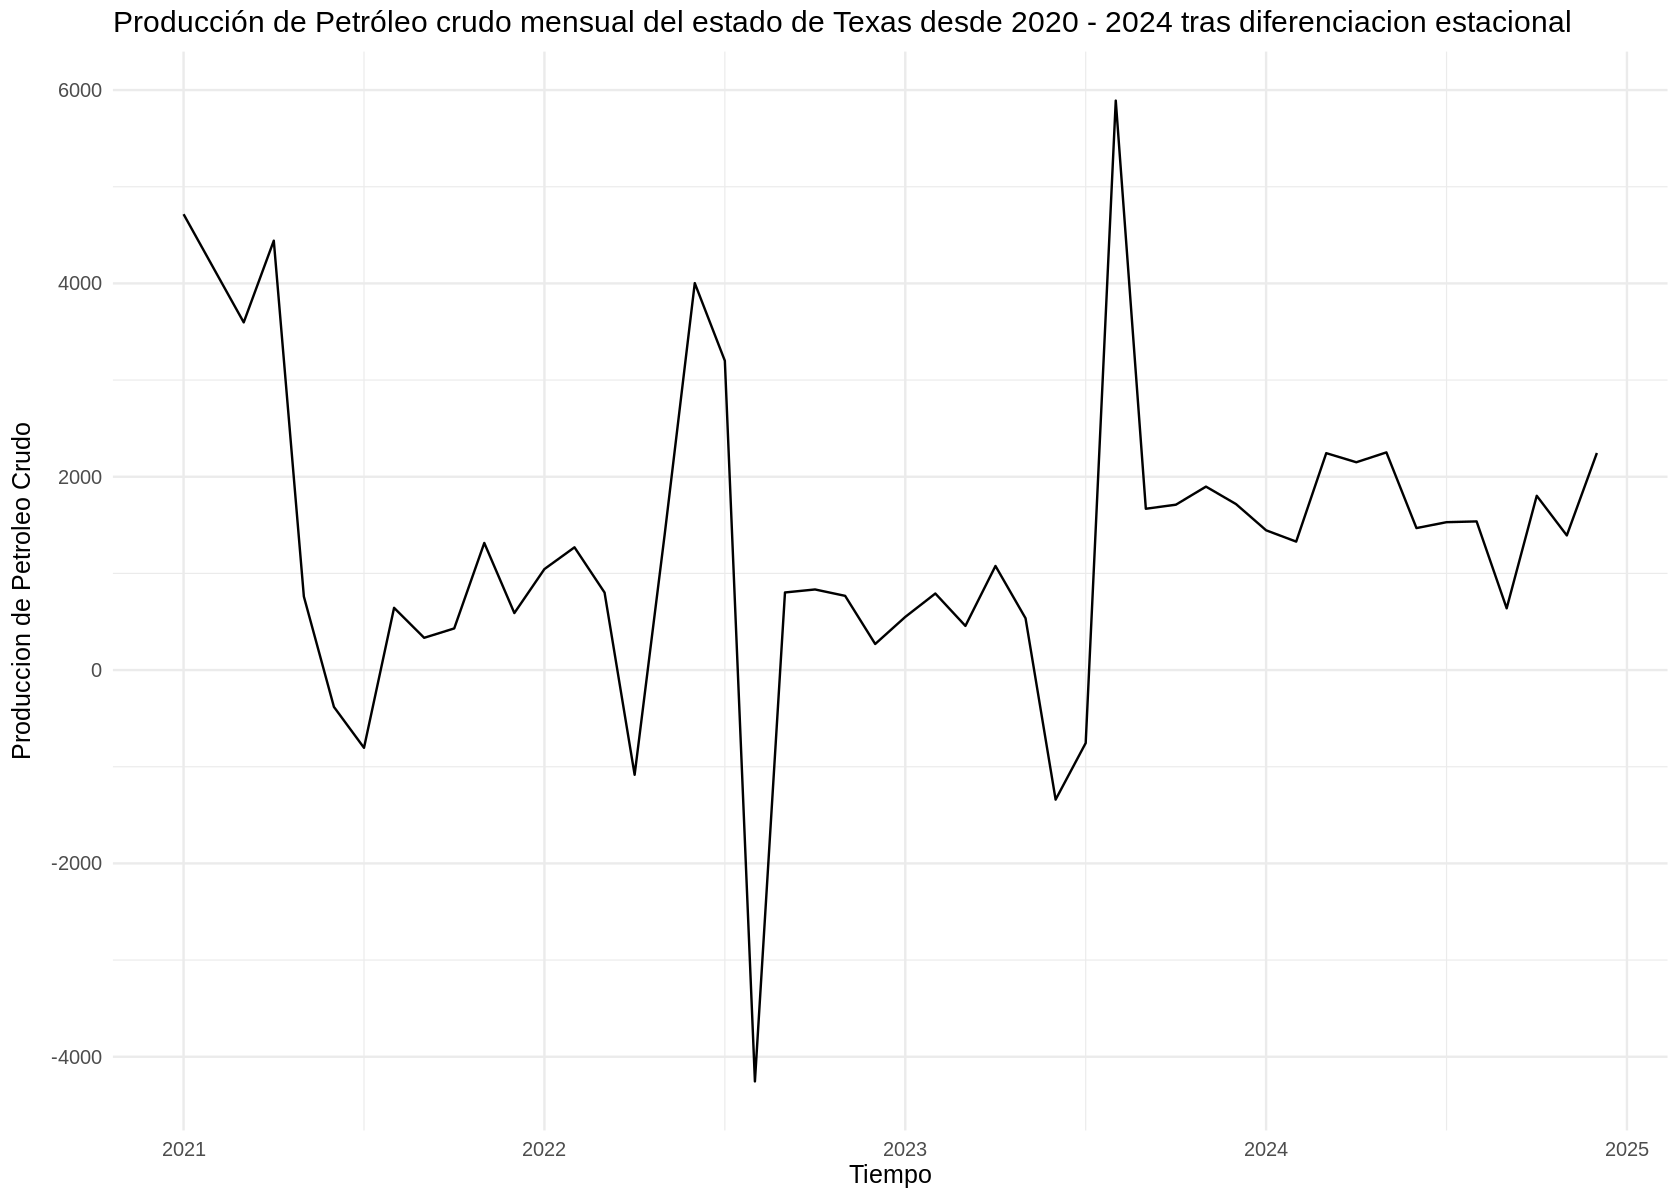

In [17]:
autoplot(oil_diff) +
  ggtitle("Producción de Petróleo crudo mensual del estado de Texas desde 2020 - 2024 tras diferenciacion estacional") +
  xlab("Tiempo") +
  ylab("Produccion de Petroleo Crudo") +
  theme_minimal(base_size = 15)

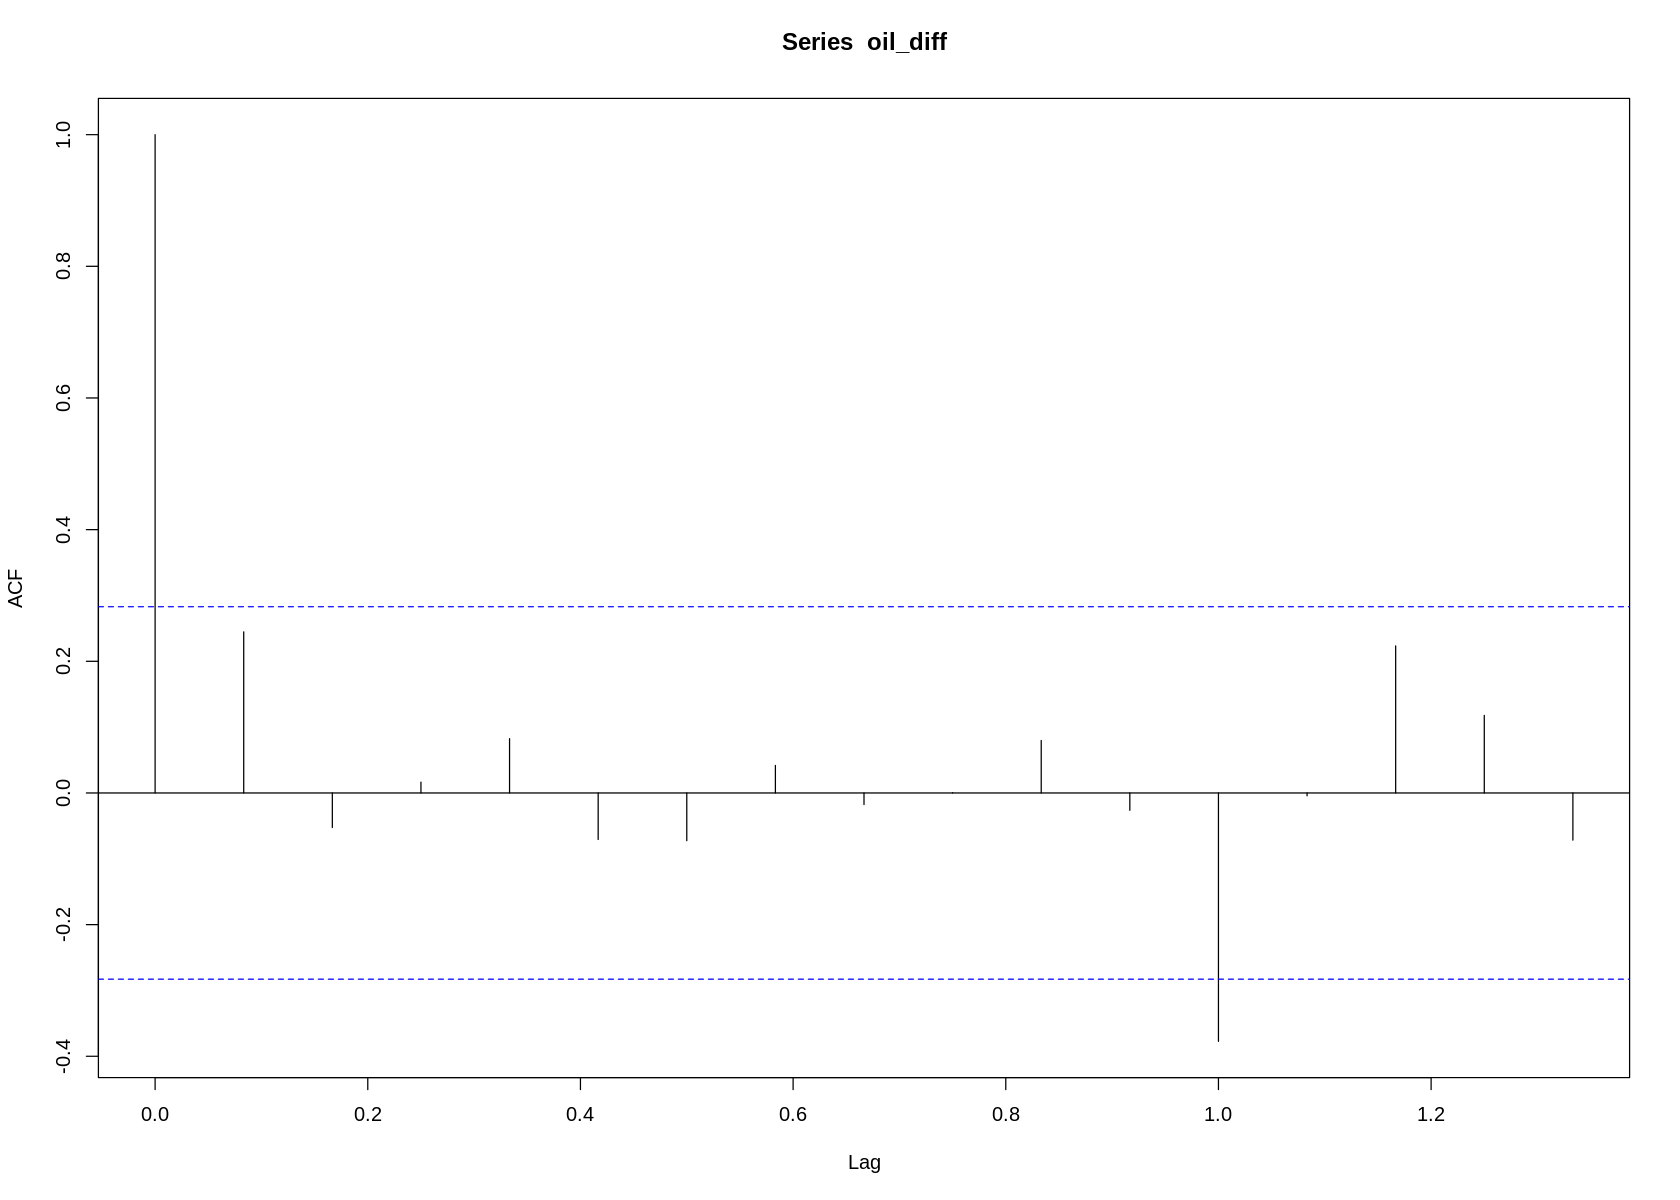

In [18]:
acf(oil_diff)

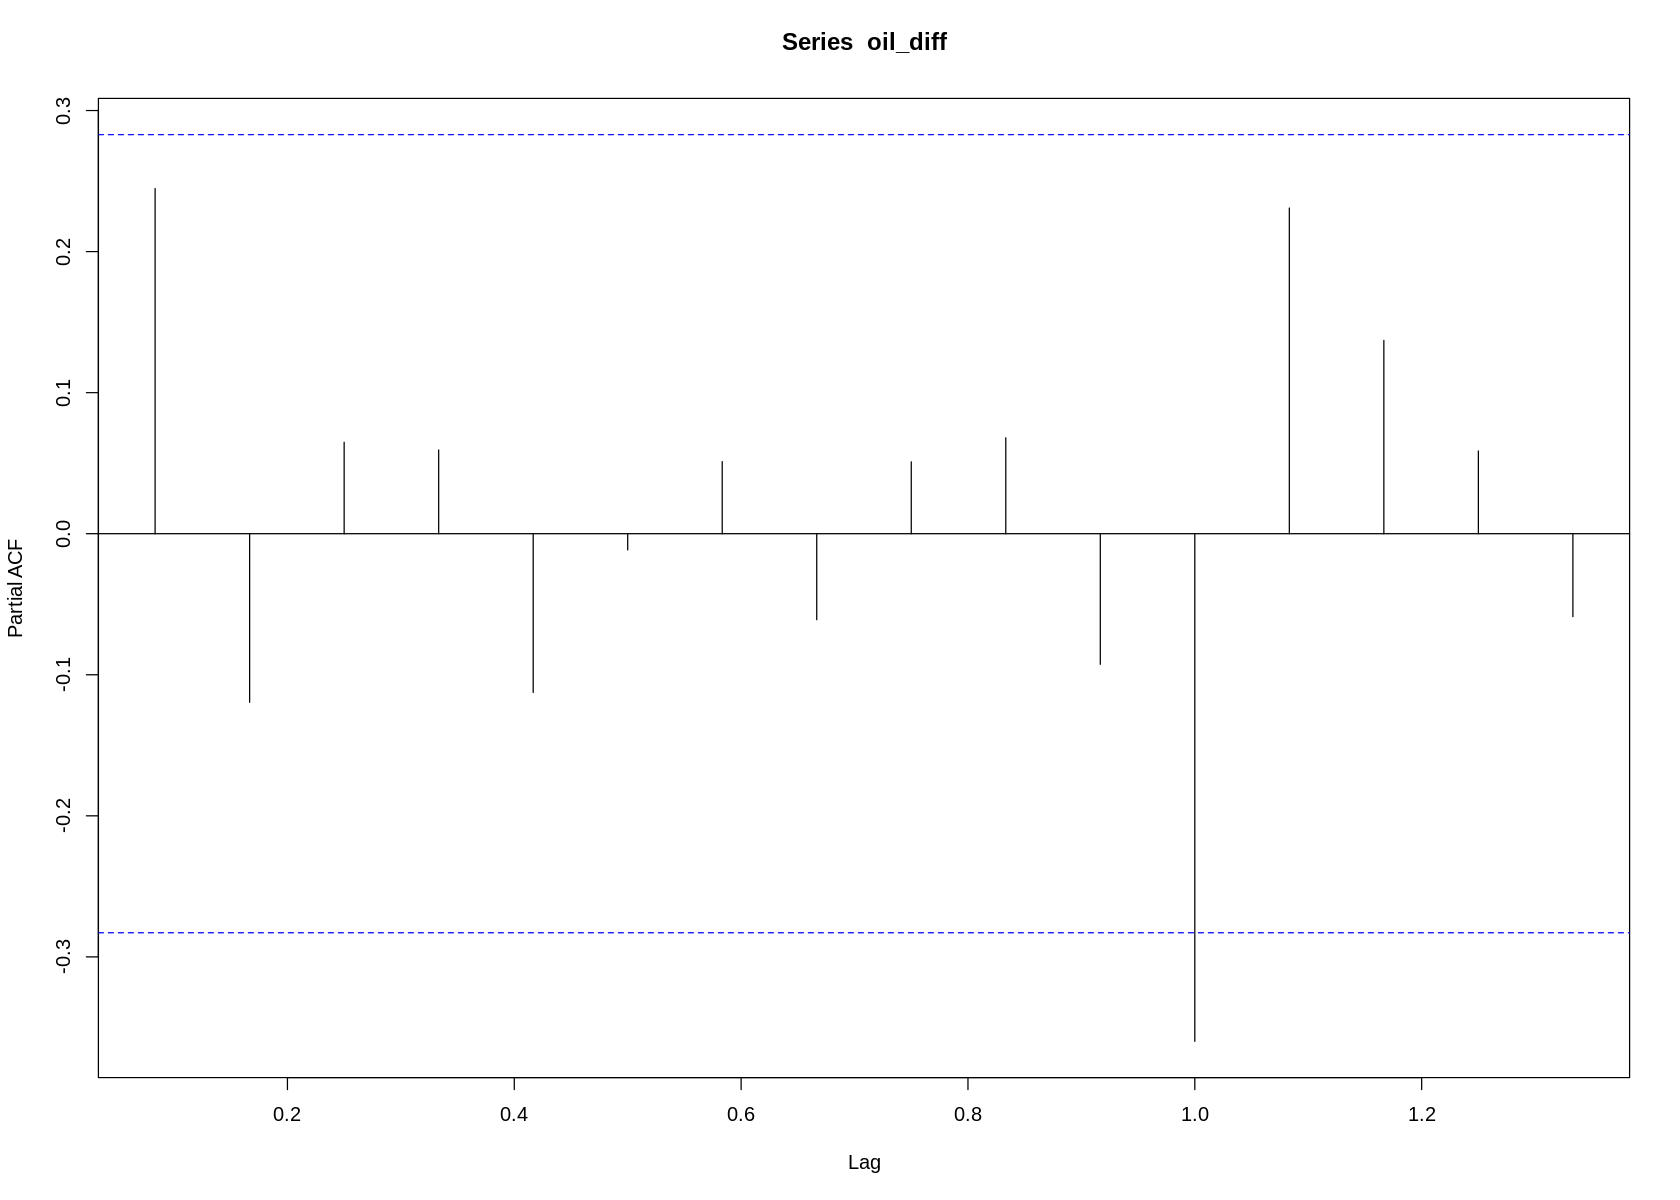

In [19]:
pacf(oil_diff)

Estos nuevo graficos nos dicen que podriamos necesitar hacer una segunda regresion estacional

Por suerte, R incluye una funcion que nos puede ser de gran ayuda para esto.

De momento creemos que puede ser un SARIMA(p, 0, 1)(1, 1, 0)(12). Dado que vemos autoregresion en los graficos pero no sabemos el orden, y necesita una diferenciacion estacional por el pico que vemos en el retardo 12 en ambos graficos. Veamos que tan correcta estaba nuestra intuicion, Utilizando la funcion auto.arima

In [20]:
modelo_auto = auto.arima(oil_ts2)
modelo_auto

Series: oil_ts2 
ARIMA(1,0,0)(1,1,0)[12] with drift 

Coefficients:
         ar1     sar1     drift
      0.3362  -0.4541  107.4348
s.e.  0.1442   0.1216   18.9465

sigma^2 = 2102118:  log likelihood = -417.39
AIC=842.79   AICc=843.72   BIC=850.27

De manera que el modelo que mejor parece ajustarse a nuestro datos es un Modelo SARIMA (1,0,0)(1,1,0)(12) con drift

## Modelo 1 SARIMA(1,0,0)(1,1,0)[12]

In [23]:
#Ajustamos el modelo
modelo_sarima1 = Arima(oil_ts2, order=c(1, 0, 0), seasonal=c(1, 1, 0), include.drift = TRUE)
summary(modelo_sarima1)

Series: oil_ts2 
ARIMA(1,0,0)(1,1,0)[12] with drift 

Coefficients:
         ar1     sar1     drift
      0.3362  -0.4541  107.4348
s.e.  0.1442   0.1216   18.9465

sigma^2 = 2102118:  log likelihood = -417.39
AIC=842.79   AICc=843.72   BIC=850.27

Training set error measures:
                 ME     RMSE      MAE         MPE     MAPE      MASE       ACF1
Training set 16.467 1255.623 783.7227 0.006699317 1.069738 0.4682378 -0.0206401

In [49]:
#Ahora pasemos a predecir los datos usando nuestros dos modelos
prediccion1 = forecast(modelo_sarima1, h = 12)

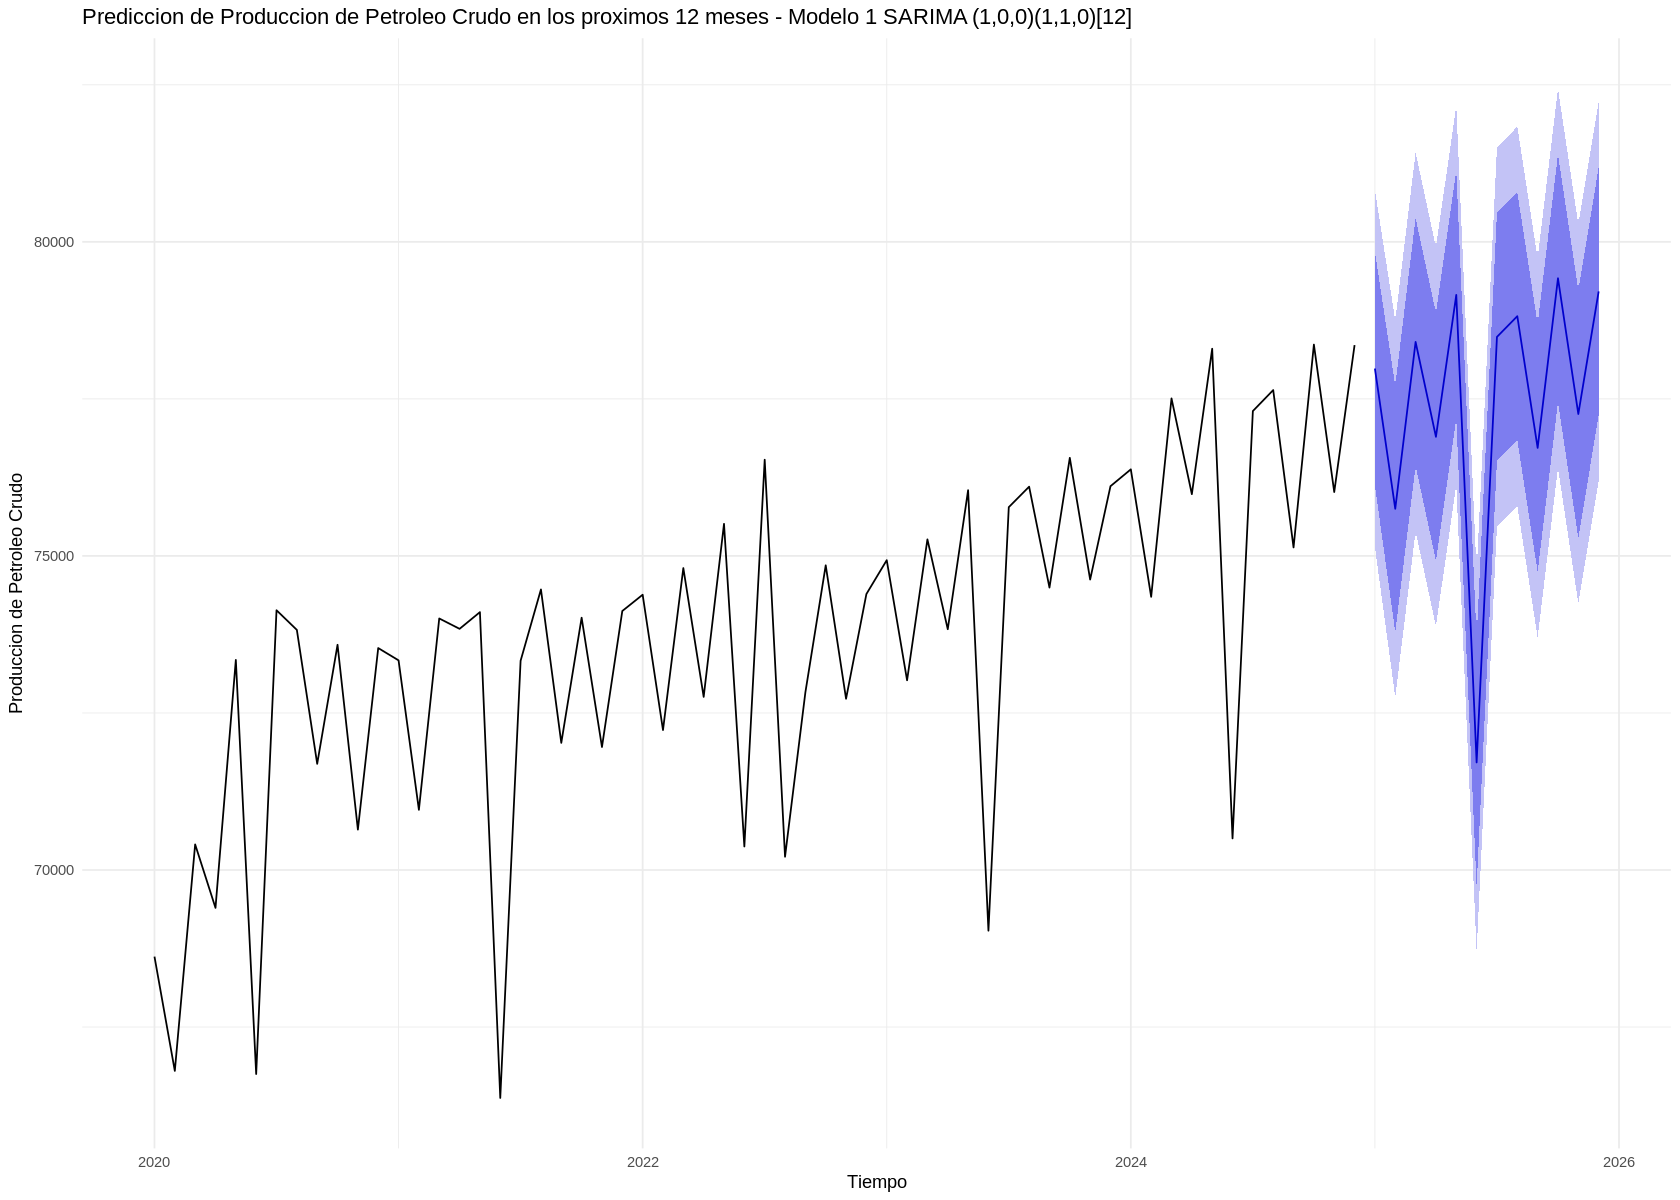

In [25]:
#Graficamos los valores predichos por el primer modelo
autoplot(prediccion1) +
  ggtitle("Prediccion de Produccion de Petroleo Crudo en los proximos 12 meses - Modelo 1 SARIMA (1,0,0)(1,1,0)[12] con drift") +
  xlab("Tiempo") +
  ylab("Produccion de Petroleo Crudo") +
  theme_minimal()

In [26]:
prediccion1

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2025       77982.99 76124.91 79841.07 75141.30 80824.68
Feb 2025       75750.25 73789.97 77710.52 72752.27 78748.23
Mar 2025       78406.41 76434.92 80377.90 75391.28 81421.55
Apr 2025       76896.06 74923.31 78868.82 73878.99 79913.13
May 2025       79154.99 77182.09 81127.88 76137.70 82172.27
Jun 2025       71712.25 69739.33 73685.16 68694.93 74729.56
Jul 2025       78486.44 76513.53 80459.36 75469.13 81503.76
Aug 2025       78816.44 76843.52 80789.36 75799.13 81833.75
Sep 2025       76719.53 74746.61 78692.44 73702.22 79736.84
Oct 2025       79419.94 77447.03 81392.86 76402.63 82437.26
Nov 2025       77259.10 75286.18 79232.02 74241.79 80276.41
Dec 2025       79210.77 77237.85 81183.69 76193.46 82228.08

In [27]:
reales_prediccion = window(oil_ts, start = c(2025, 1), end = c(2025, 7))
reales_prediccion


,Jan,Feb,Mar,Apr,May,Jun,Jul
2025,78640,77030,79890,77344,80734,72591,80609


In [67]:
#Calculamos el error cuadratico medio RMSE
sqrt(mean((prediccion1$mean[1:7] - reales_prediccion)^2))

[1] 1322.436

In [68]:
#Calculamos ahora el error Error Porcentual Medio Absoluto MAPE
mean(abs((prediccion1$mean[1:7] - reales_prediccion)/ reales_prediccion))*100

[1] 1.533222


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0)(1,1,0)[12] with drift
Q* = 4.6652, df = 10, p-value = 0.9124

Model df: 2.   Total lags used: 12



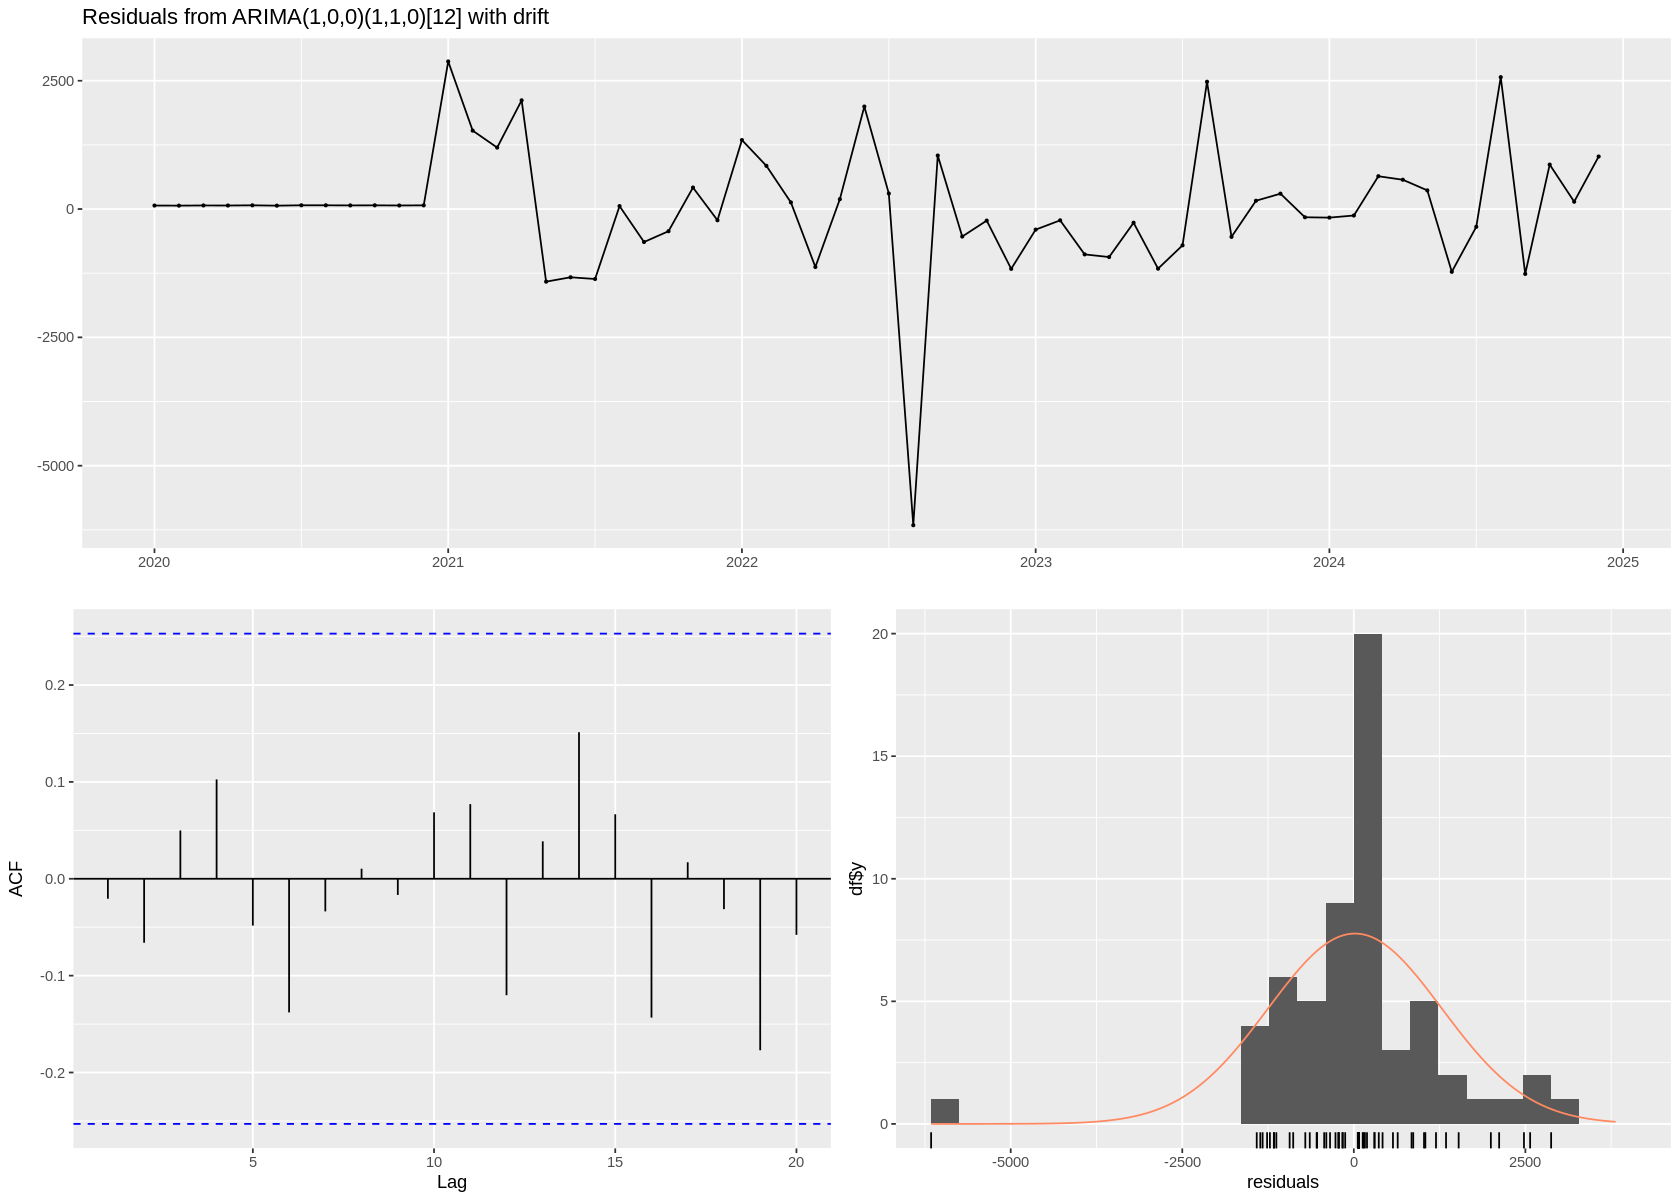

In [58]:
checkresiduals(modelo_sarima1)

## Modelo 2 SARIMA(1,0,1)(1,1,0)[12]

Pero intentemos de todas maneras ajustar un modelo con lo que nuestra intuicion nos decia.

Un modelo SARIMA(1,0,1)(1,1,0)(12)

In [71]:
modelo_sarima2 = Arima(oil_ts2, order = c(1, 0, 1), seasonal = c(1, 1, 0), include.drift = TRUE)
summary(modelo_sarima2)

Series: oil_ts2 
ARIMA(1,0,1)(1,1,0)[12] with drift 

Coefficients:
         ar1     ma1     sar1     drift
      0.2480  0.0951  -0.4502  106.9648
s.e.  0.6448  0.6632   0.1252   18.5887

sigma^2 = 2151464:  log likelihood = -417.38
AIC=844.77   AICc=846.2   BIC=854.12

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 19.36573 1256.081 792.4979 0.0106918 1.081123 0.4734805
                    ACF1
Training set -0.02481957

Veamos como le va a nuestro segundo modelo

In [63]:
prediccion2 = forecast(modelo_sarima2, h = 12)

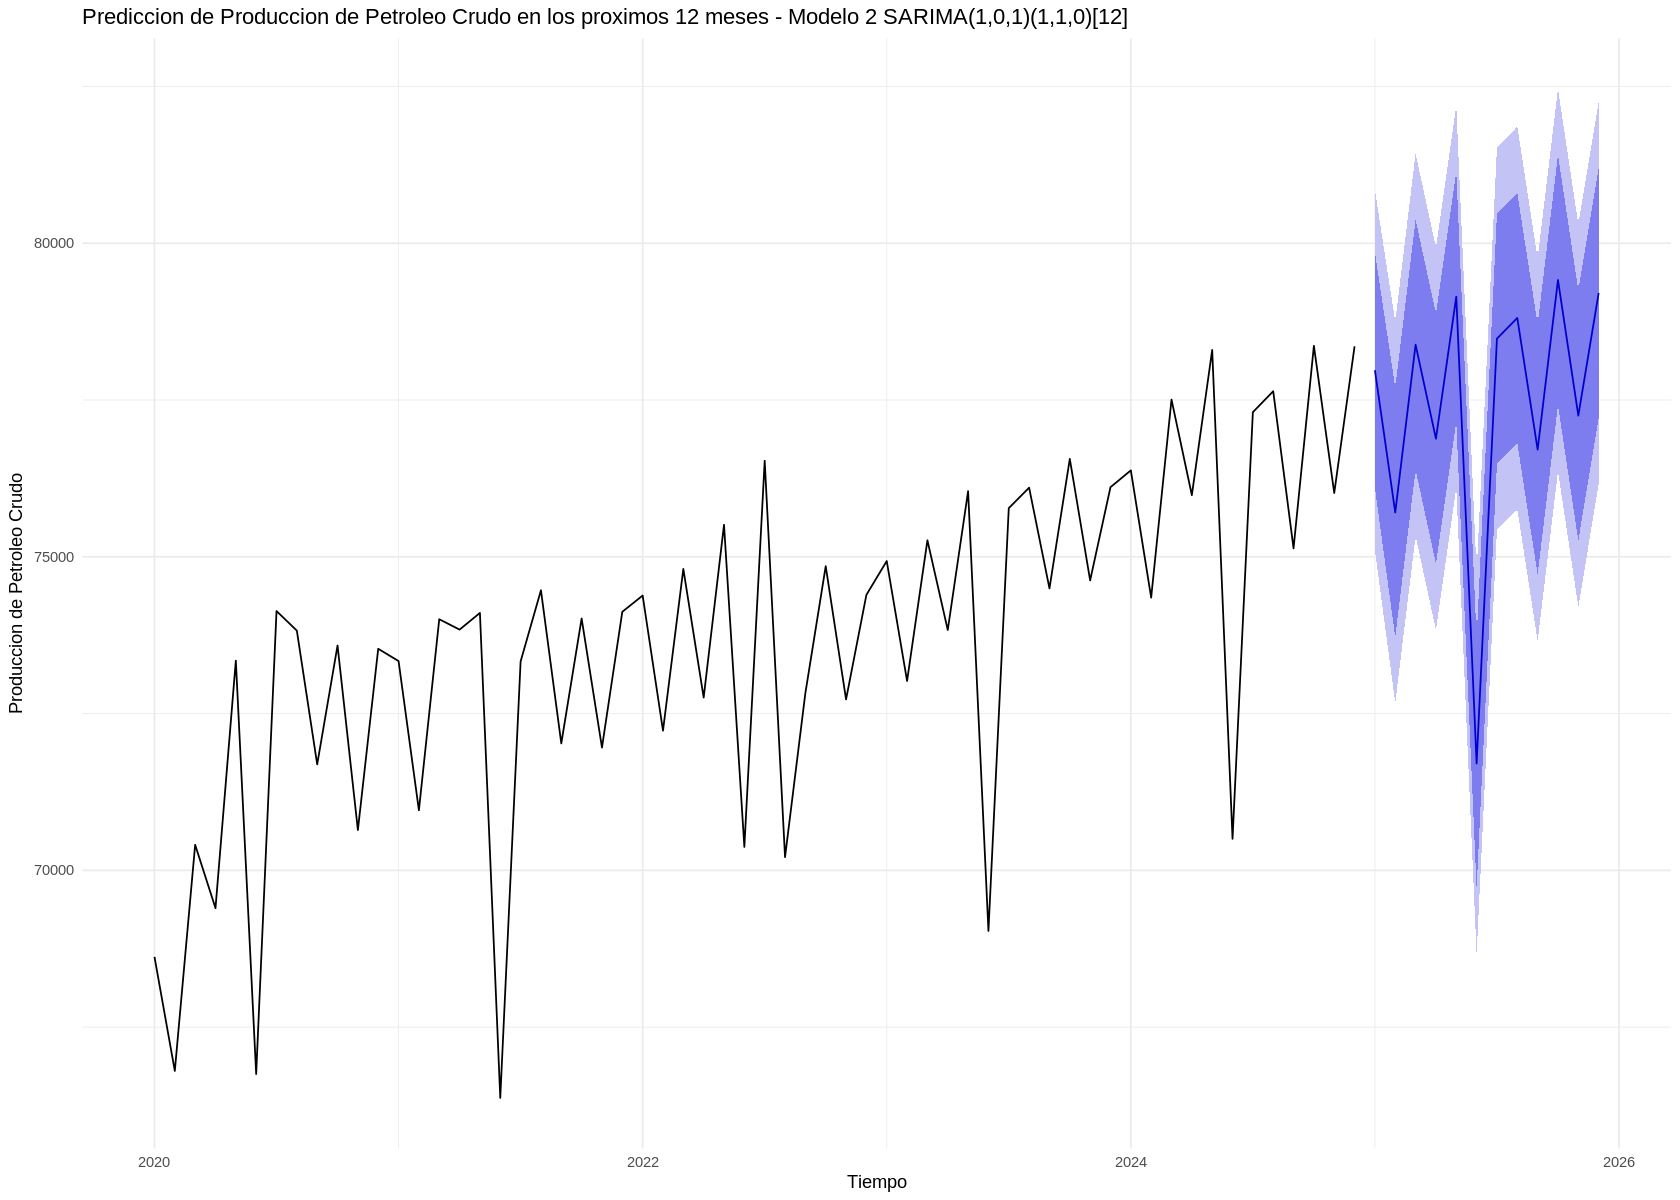

In [69]:
#Graficamos los valores predichos por el primer modelo
autoplot(prediccion2) +
  ggtitle("Prediccion de Produccion de Petroleo Crudo en los proximos 12 meses - Modelo 2 SARIMA(1,0,1)(1,1,0)[12] con drift") +
  xlab("Tiempo") +
  ylab("Produccion de Petroleo Crudo") +
  theme_minimal()

In [65]:
#Calculamos el error cuadratico medio RMSE
sqrt(mean((prediccion2$mean[1:7] - reales_prediccion)^2))

[1] 1337.425

In [66]:
#Calculamos ahora el error Error Porcentual Medio Absoluto MAPE
mean(abs((prediccion2$mean[1:7] - reales_prediccion)/ reales_prediccion))*100

[1] 1.553843

In [41]:
prediccion2$mean

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2025,78164.63,76150.92,78826.86,77308.40,79535.01,72079.36,78815.04,79107.94,77000.15,79631.39,77446.83,79339.34


Podemos observar que los errores de nuestro segundo modelo son mucho menores, por lo que resulta realmente ser el modelo superior a la hora de predecir el comportamiento de los datos


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(1,1,0)[12] with drift
Q* = 4.2879, df = 9, p-value = 0.8915

Model df: 3.   Total lags used: 12



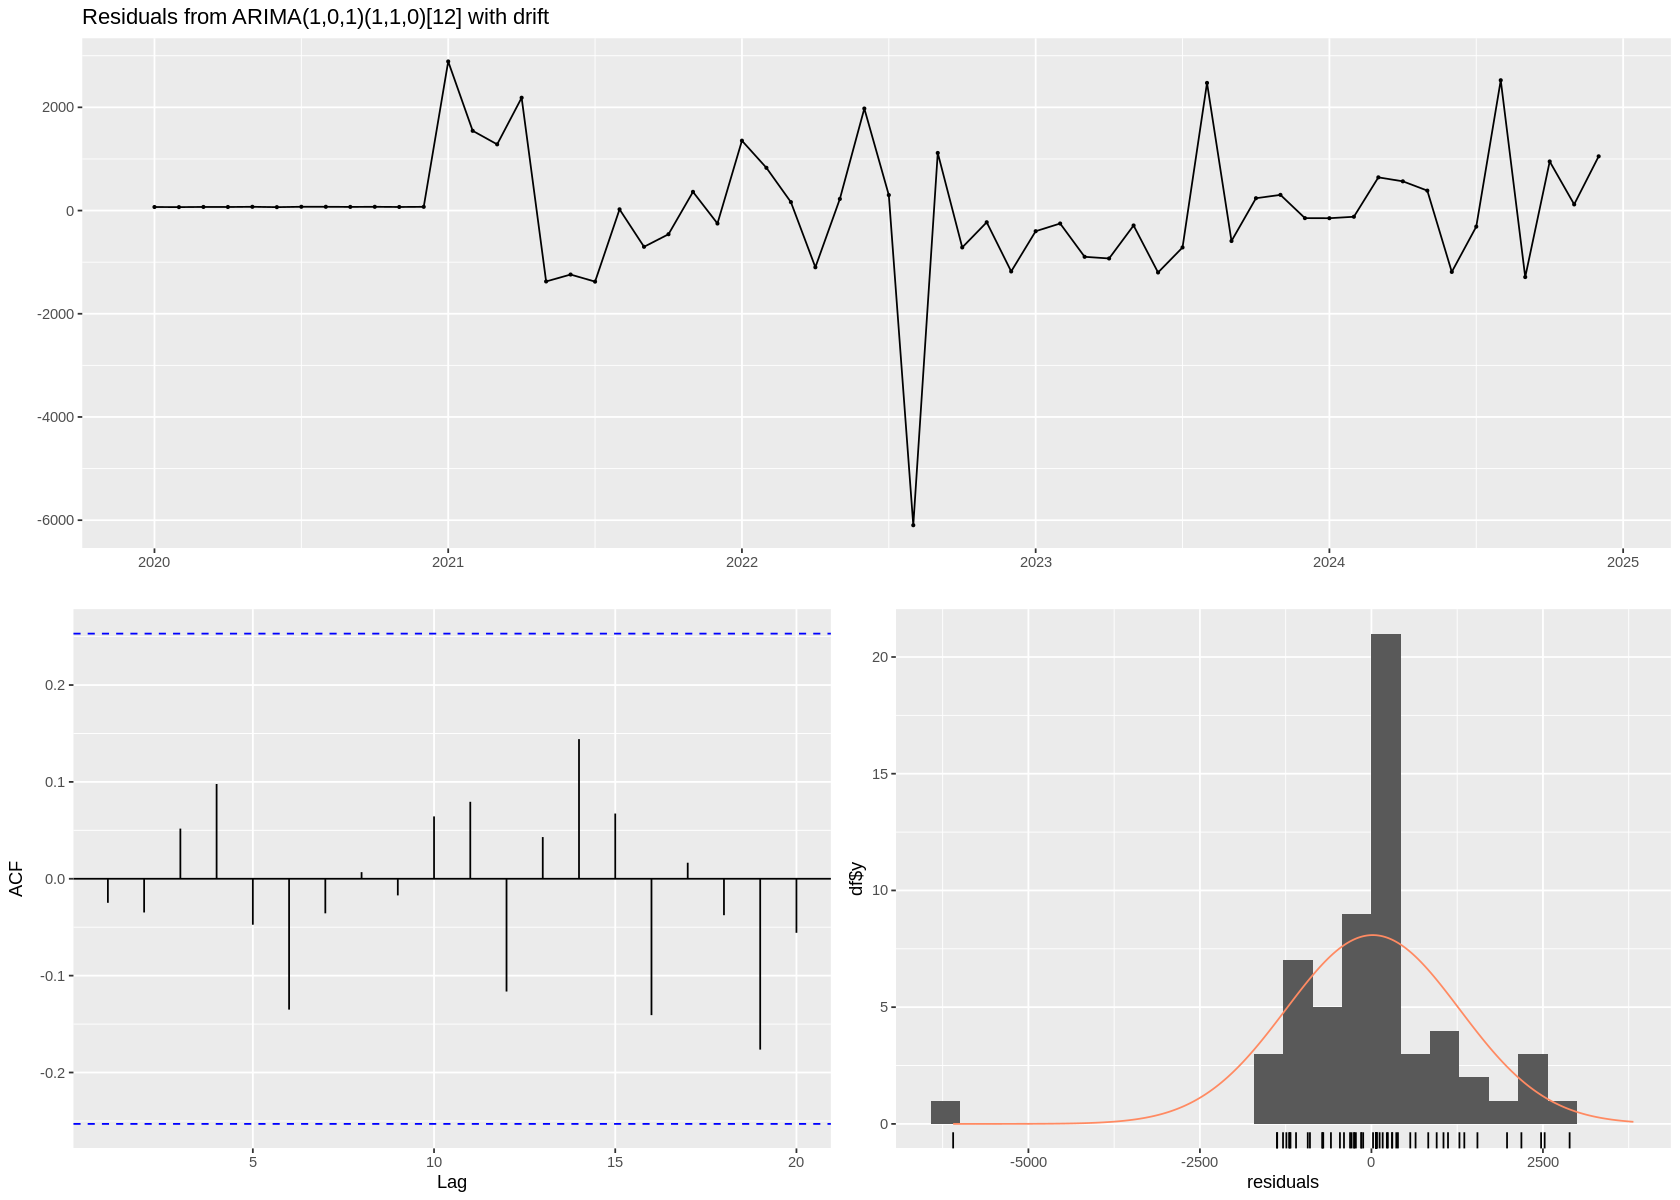

In [59]:
checkresiduals(modelo_sarima2)

## Modelo 3 SARIMA(1,0,1)(1,1,1)[12]

Pero probemos un ultimo tercer modelo, un SARIMA(1,0,1)(1,1,1)(12)

In [72]:
modelo_sarima3 = Arima(oil_ts2, order = c(1, 0, 1), seasonal = c(1, 1, 1), include.drift = TRUE)
summary(modelo_sarima3)

Series: oil_ts2 
ARIMA(1,0,1)(1,1,1)[12] with drift 

Coefficients:
         ar1      ma1     sar1     sma1     drift
      0.4025  -0.0120  -0.1639  -0.9999  106.6638
s.e.  0.6133   0.6602   0.1689   0.2941   12.9039

sigma^2 = 1164126:  log likelihood = -412.03
AIC=836.06   AICc=838.11   BIC=847.29

Training set error measures:
                  ME     RMSE      MAE         MPE      MAPE      MASE
Training set 8.63367 913.3949 560.5292 0.003124447 0.7670119 0.3348901
                    ACF1
Training set -0.03767021

Tenemos un AIC y BIC menor que los otros dos modelos por lo que parece ser superior a los otros, probemos ahora su capacidad de prediccion.

In [73]:
#Predecimos los datos con nuestro tercer modelo
prediccion3 = forecast(modelo_sarima3, h = 12)

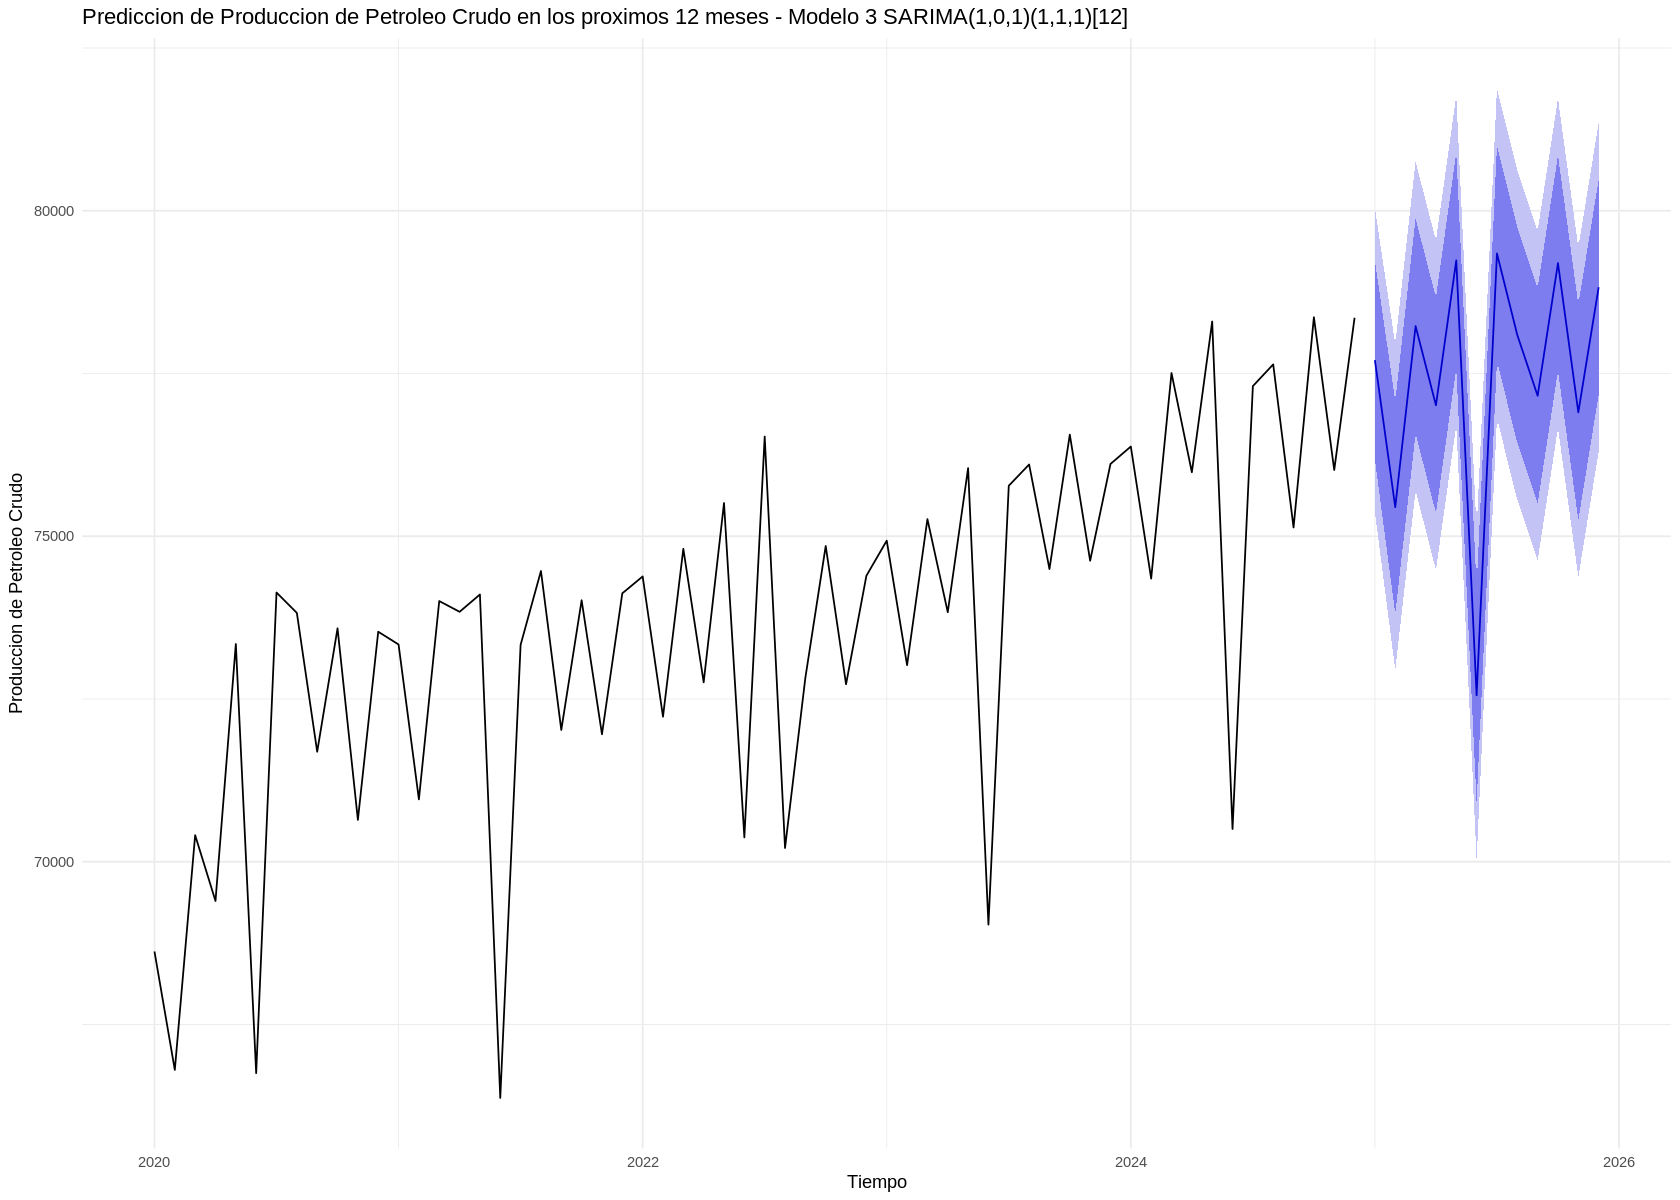

In [74]:
#Graficamos los valores predichos por el tercer modelo
autoplot(prediccion3) +
  ggtitle("Prediccion de Produccion de Petroleo Crudo en los proximos 12 meses - Modelo 3 SARIMA(1,0,1)(1,1,1)[12] con drift") +
  xlab("Tiempo") +
  ylab("Produccion de Petroleo Crudo") +
  theme_minimal()

In [82]:
#Calculamos el error cuadratico medio RMSE
sqrt(mean((prediccion3$mean[1:7] - reales_prediccion)^2))

[1] 1200.915

In [83]:
#Calculamos ahora el error Error Porcentual Medio Absoluto MAPE
mean(abs((prediccion3$mean[1:7] - reales_prediccion)/ reales_prediccion))*100

[1] 1.31792

In [ ]:
prediccion2$mean

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2025,78164.63,76150.92,78826.86,77308.40,79535.01,72079.36,78815.04,79107.94,77000.15,79631.39,77446.83,79339.34


In [ ]:
reales_prediccion

,Jan,Feb,Mar,Apr,May,Jun,Jul
2025,78640,77030,79890,77344,80734,72591,80609



	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(1,1,1)[12] with drift
Q* = 6.9025, df = 8, p-value = 0.5472

Model df: 4.   Total lags used: 12



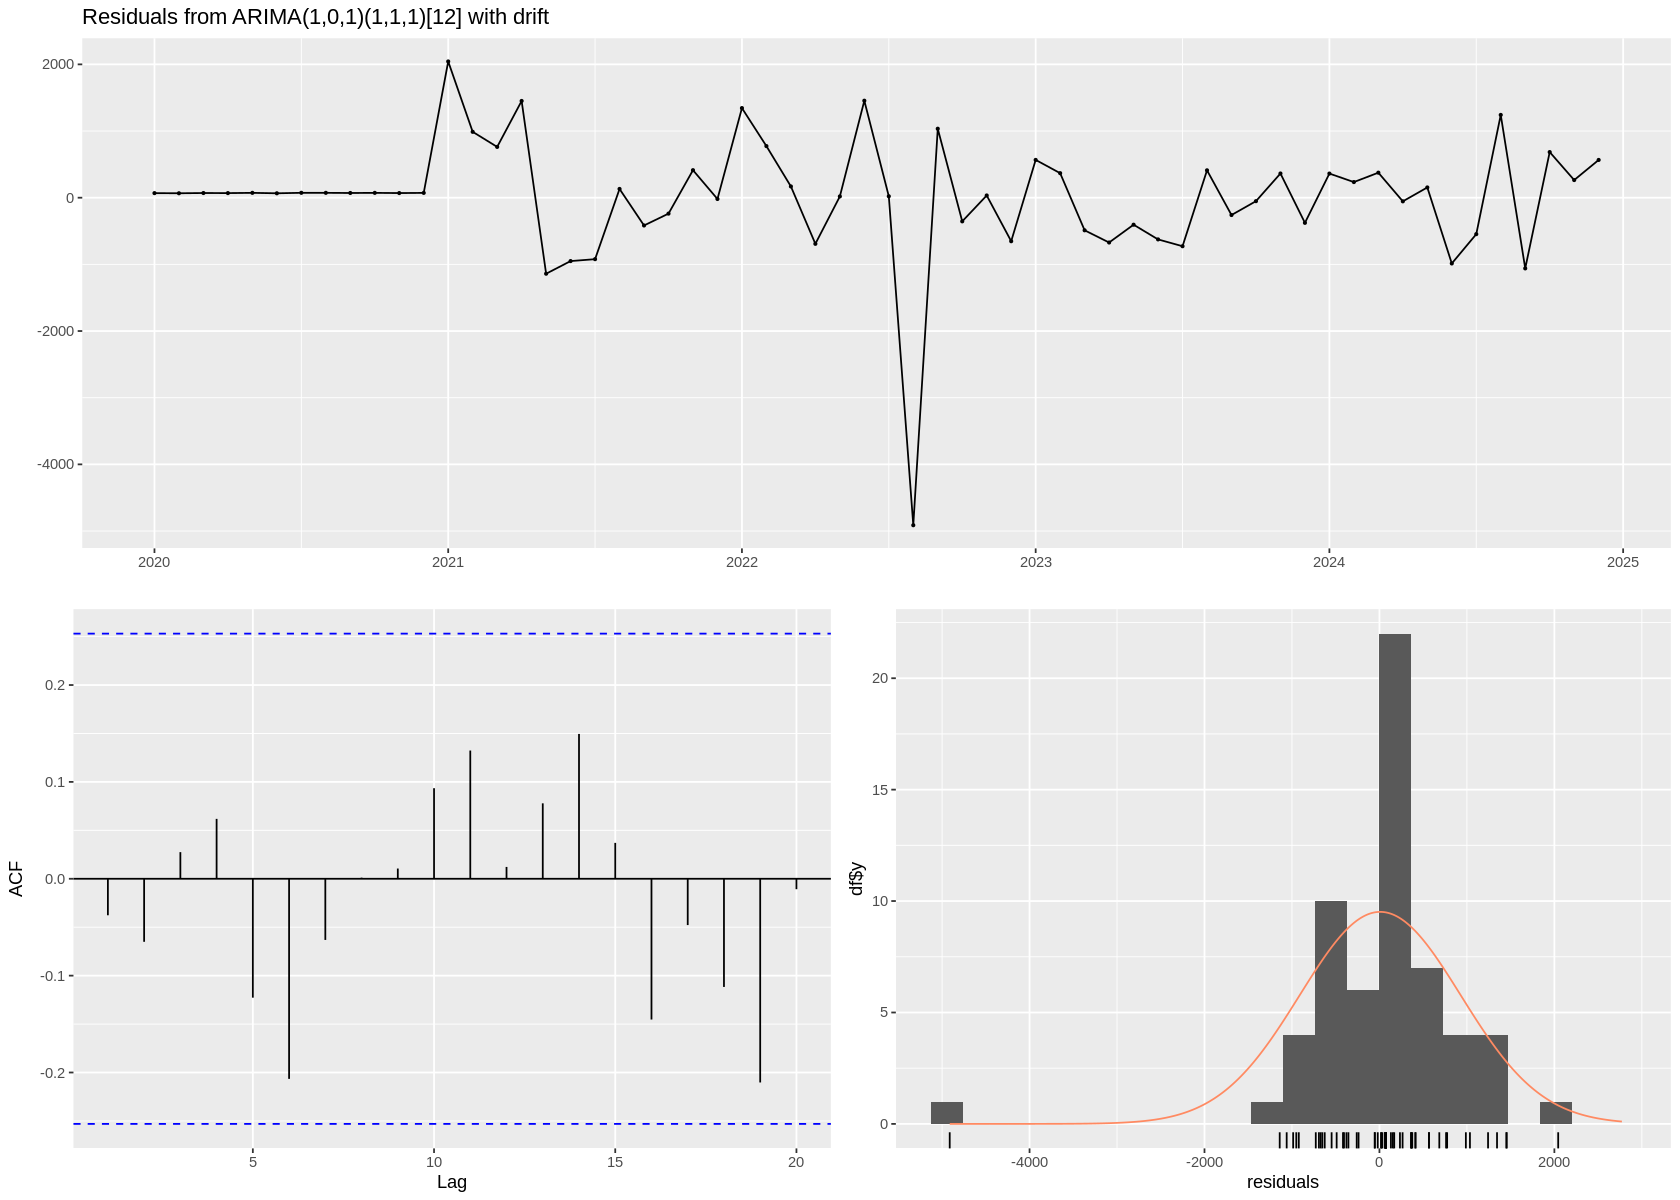

In [77]:
checkresiduals(modelo_sarima3)

Hemos conseguido reducir aun mas el error. Por lo que el tercer modelo es el mas efectivo para nuestros datos.

## Modelo 4 SARIMA(1,0,1)(1,2,1)[12]

Por pura curiosidad vamos a intentar un cuarto modelo, un SARIMA(1,0,1)(1,2,1)[12]

In [79]:
modelo_sarima4 = Arima(oil_ts2, order = c(1, 0, 1), seasonal = c(1, 2, 1))
summary(modelo_sarima4)

Series: oil_ts2 
ARIMA(1,0,1)(1,2,1)[12] 

Coefficients:
         ar1     ma1     sar1     sma1
      0.0038  0.2938  -0.2545  -0.9982
s.e.  0.0010  0.1676   0.0653   0.1650

sigma^2 = 3076680:  log likelihood = -328.66
AIC=667.31   AICc=669.31   BIC=675.23

Training set error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set -49.95931 1280.975 766.6274 -0.08549129 1.032761 0.4580241
                    ACF1
Training set -0.01835953

Presenta mejores valores de AIC y BIC, ahora veamos que tal sus errores a la hora de predecir

In [80]:
prediccion4 = forecast(modelo_sarima4, h = 12)

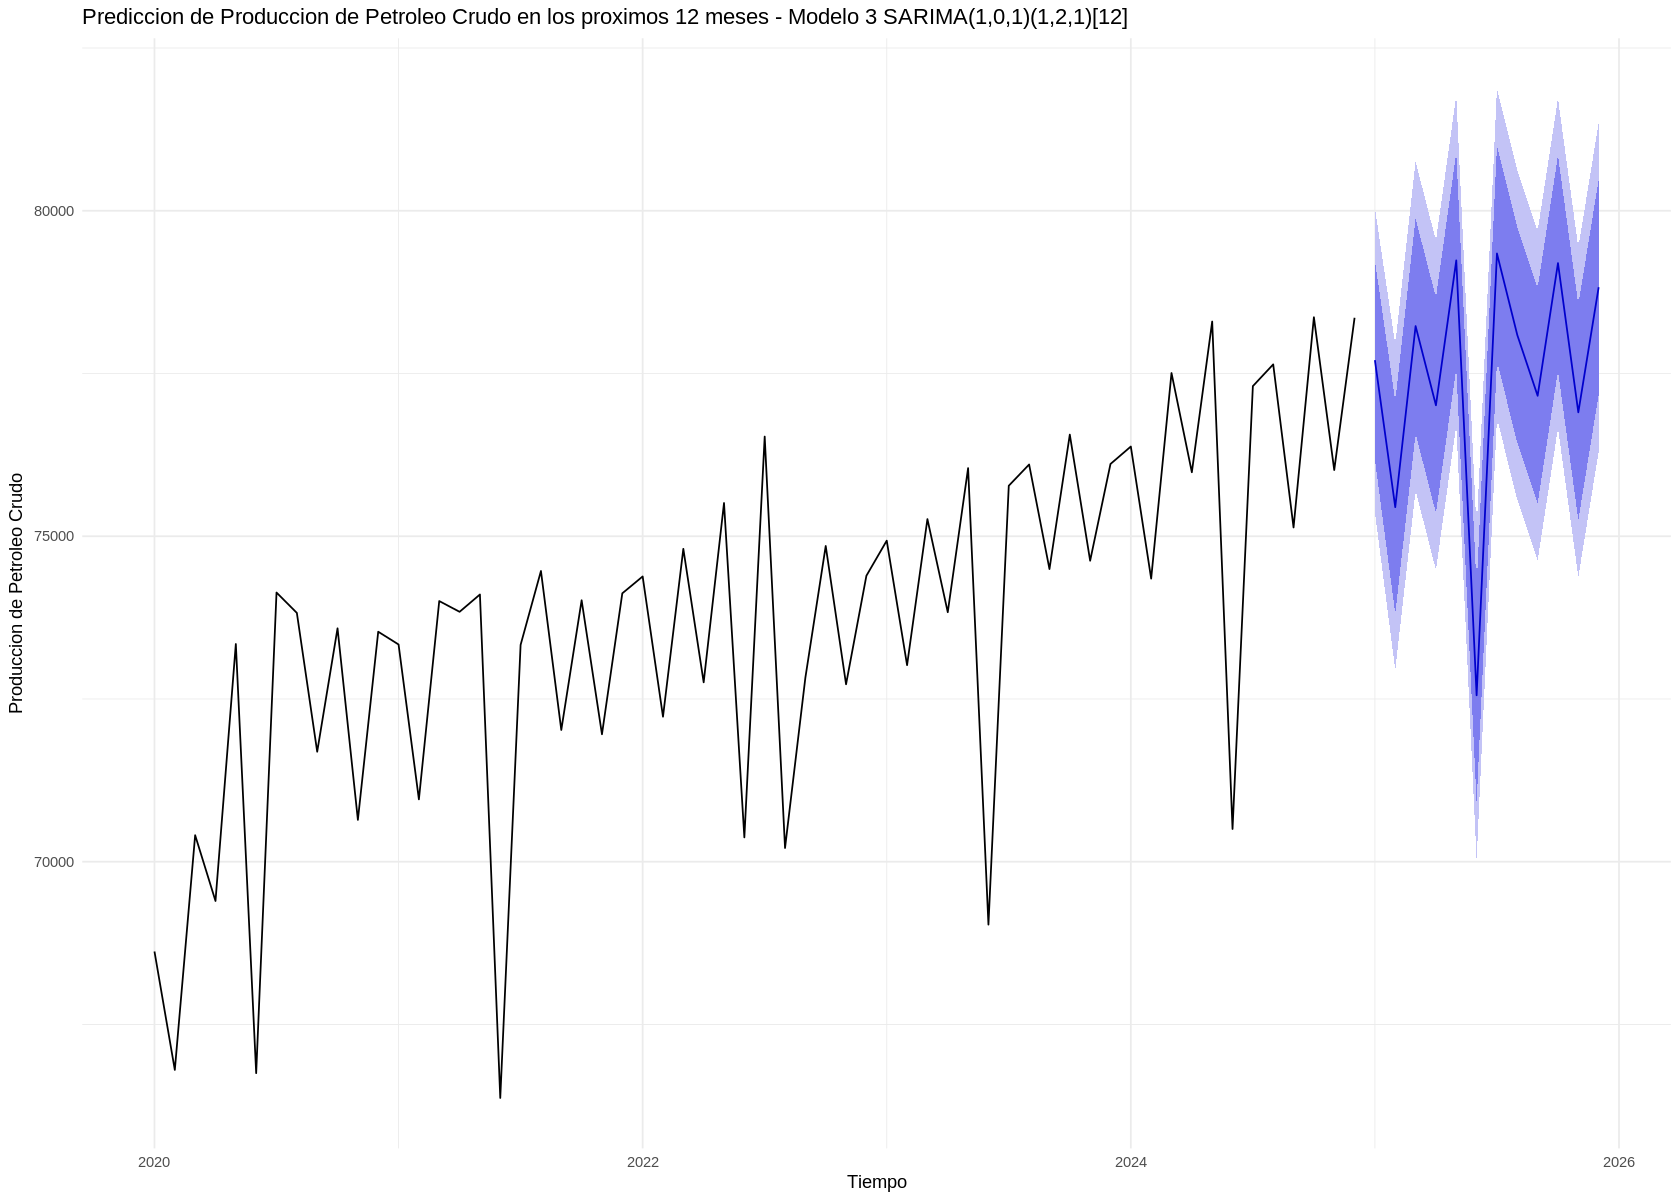

In [81]:
#Graficamos los valores predichos por el cuarto modelo
autoplot(prediccion3) +
  ggtitle("Prediccion de Produccion de Petroleo Crudo en los proximos 12 meses - Modelo 3 SARIMA(1,0,1)(1,2,1)[12]") +
  xlab("Tiempo") +
  ylab("Produccion de Petroleo Crudo") +
  theme_minimal()

In [84]:
#Calculamos el error cuadratico medio RMSE
sqrt(mean((prediccion4$mean[1:7] - reales_prediccion)^2))

[1] 1314.112

In [85]:
#Calculamos ahora el error Error Porcentual Medio Absoluto MAPE
mean(abs((prediccion4$mean[1:7] - reales_prediccion)/ reales_prediccion))*100

[1] 1.297192


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(1,2,1)[12]
Q* = 3.6057, df = 8, p-value = 0.8908

Model df: 4.   Total lags used: 12



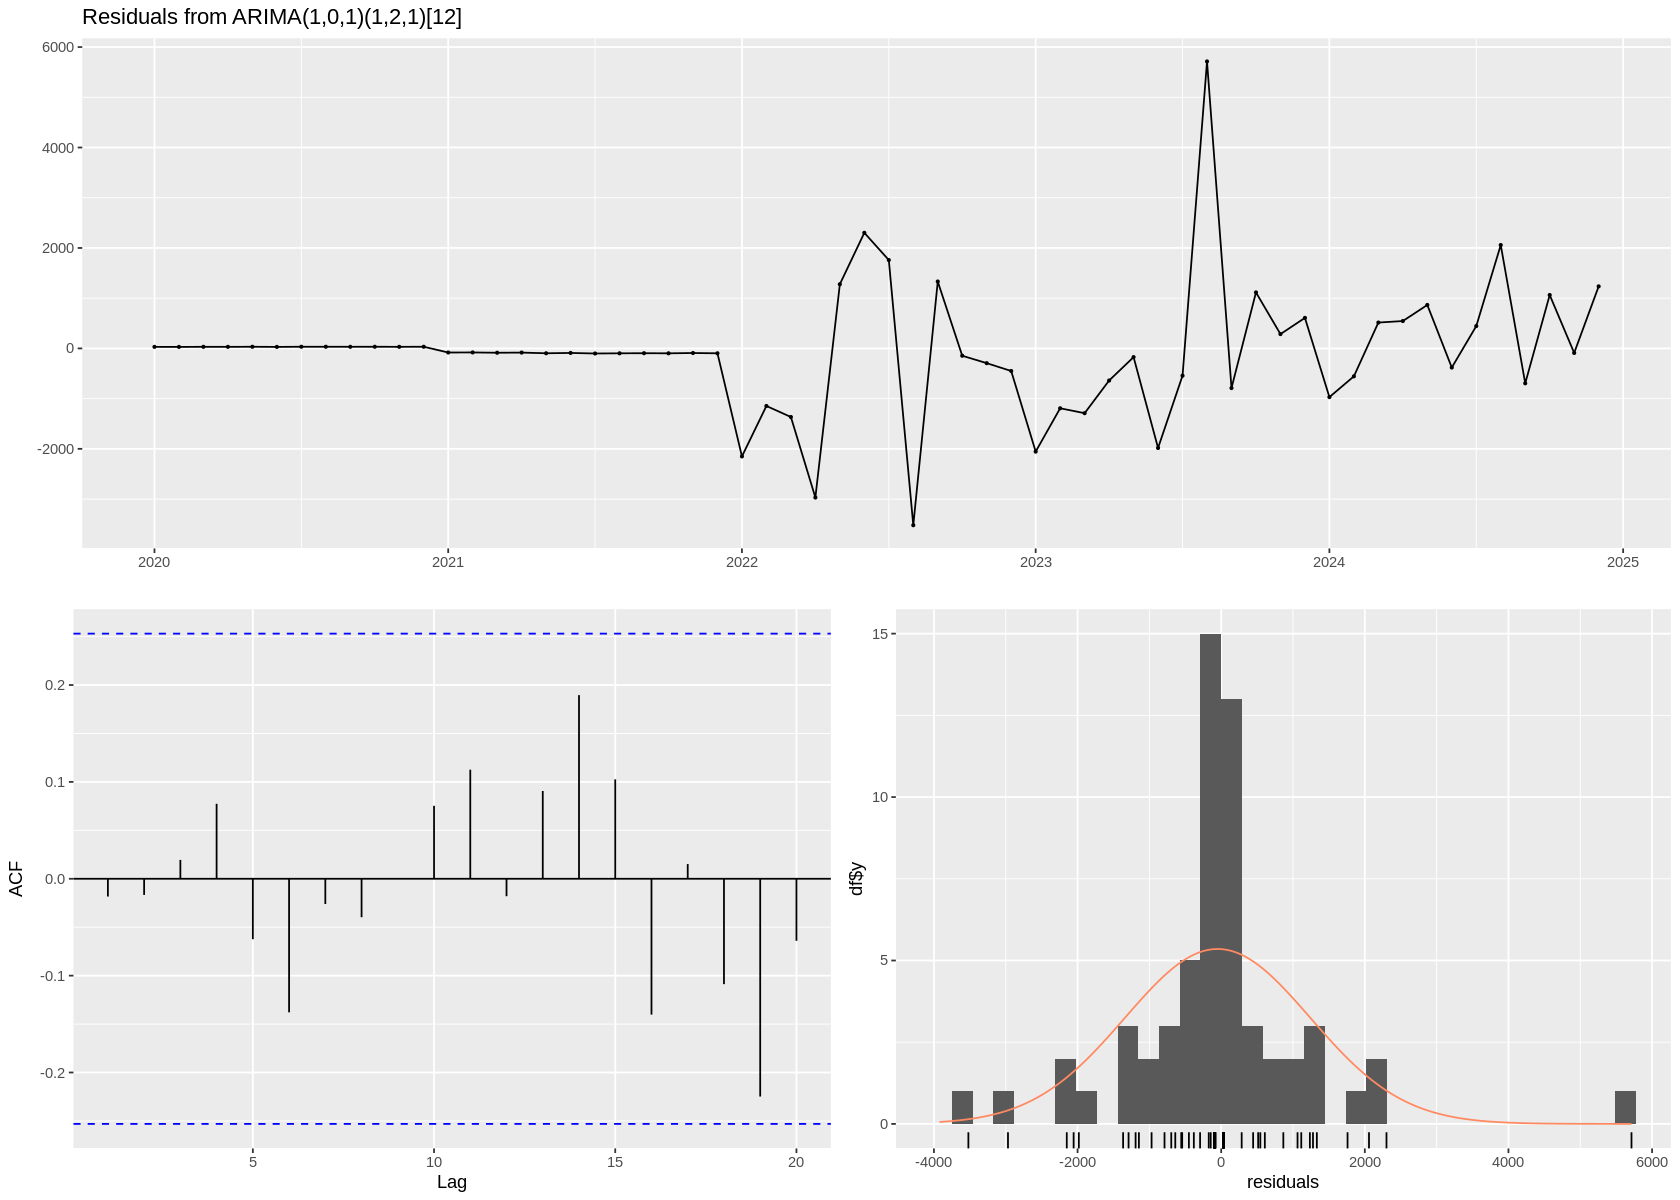

In [61]:
checkresiduals(modelo_sarima4)

Aunque posee un mejor AIC y BIC que los otros modelos, tiene un peor error que el modelo 2 y 3.